In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/Internship Jul-Aug 2023/Project 2/creditcard.csv")
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


#### Splitting the data

In [3]:
x = df.iloc[:, :-1]
y= df.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12, test_size=0.10)

In [6]:
x_train.shape

(135001, 17)

In [7]:
# Concatinating the independent anddependent data
training_data = pd.concat([x_train, y_train], axis=1)

In [8]:
sample_training_data = training_data.copy()

In [9]:
test_data = pd.concat([x_test, y_test], axis=1)

In [10]:
#Checking thenull values
training_data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           26766
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         26766
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3541
Good_Bad                                    2
dtype: int64

In [11]:
#Finding the null values index
training_data[training_data["NPA Status"].isnull()].index

Int64Index([150001, 150000], dtype='int64')

In [12]:
for col in training_data.columns:
    a = training_data[training_data[col].isnull()].index
    print(col, a)

NPA Status Int64Index([150001, 150000], dtype='int64')
RevolvingUtilizationOfUnsecuredLines Int64Index([150001, 150000], dtype='int64')
age Int64Index([150001, 150000], dtype='int64')
Gender Int64Index([150001, 150000], dtype='int64')
Region Int64Index([150001, 150000], dtype='int64')
MonthlyIncome Int64Index([ 80798,  98512, 144893, 109441, 115051,  24090,  57110,   6695,
            137398, 118144,
            ...
             49210,  90570,  49910, 135920, 136266,   9846,  20953, 114565,
            122929,  40177],
           dtype='int64', length=26766)
Rented_OwnHouse Int64Index([150001, 150000], dtype='int64')
Occupation Int64Index([150001, 150000], dtype='int64')
Education Int64Index([150001, 150000], dtype='int64')
NumberOfTime30-59DaysPastDueNotWorse Int64Index([150001, 150000], dtype='int64')
DebtRatio Int64Index([150001, 150000], dtype='int64')
MonthlyIncome.1 Int64Index([ 80798,  98512, 144893, 109441, 115051,  24090,  57110,   6695,
            137398, 118144,
           

In [13]:
training_data = training_data.drop([150001, 150000], axis=0)

In [14]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26764
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         26764
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3541
Good_Bad                                    0
dtype: int64

In [15]:
training_data["MonthlyIncome"].head(10)

135928     7078.0
95567      5617.0
80798         NaN
98512         NaN
66964      8051.0
101881     9083.0
32673     10416.0
147139     5920.0
31715      3172.0
102694     2750.0
Name: MonthlyIncome, dtype: float64

In [16]:
training_data["MonthlyIncome.1"].head(10)

135928     7078.0
95567      5617.0
80798         NaN
98512         NaN
66964      8051.0
101881     9083.0
32673     10416.0
147139     5920.0
31715      3172.0
102694     2750.0
Name: MonthlyIncome.1, dtype: float64

In [17]:
training_data["MonthlyIncome"].std() == training_data["MonthlyIncome.1"].std()

True

In [18]:
duplicate_column = []
for i in range (training_data.shape[1]):
    a = df.iloc[:, i]
    for j in range (i+1, training_data.shape[1]):
        b = df.iloc[:, j]
        if a.equals(b):
            duplicate_column.append(training_data.columns.values[j])
duplicate_column

['MonthlyIncome.1']

In [19]:
# Since monthly income and monthly income1 have same data, we'll remove one.
training_data = training_data.drop(['MonthlyIncome.1'], axis=1)

In [20]:
# Removing MonthlyIncome.1 column from test data as well

In [21]:
test_data = test_data.drop(['MonthlyIncome.1'], axis=1)

In [22]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26764
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3541
Good_Bad                                    0
dtype: int64

In [26]:
training_data["MonthlyIncome"]

135928    7078.0
95567     5617.0
80798        NaN
98512        NaN
66964     8051.0
           ...  
122929       NaN
61872     2000.0
128963    3550.0
36482     8333.0
40177        NaN
Name: MonthlyIncome, Length: 134999, dtype: float64

In [23]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134999 entries, 135928 to 40177
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            134999 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  134999 non-null  float64
 2   age                                   134999 non-null  float64
 3   Gender                                134999 non-null  object 
 4   Region                                134999 non-null  object 
 5   MonthlyIncome                         108235 non-null  float64
 6   Rented_OwnHouse                       134999 non-null  object 
 7   Occupation                            134999 non-null  object 
 8   Education                             134999 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  134999 non-null  float64
 10  DebtRatio                             134999 non-null  float64
 

In [24]:
#since NumberOfDependents column is an object one but having numbers. Hence, changing its type
training_data["NumberOfDependents"] = pd.to_numeric(training_data["NumberOfDependents"], downcast=None)
test_data["NumberOfDependents"] = pd.to_numeric(test_data["NumberOfDependents"], downcast=None)

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15001 entries, 19470 to 104467
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NPA Status                            15001 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  15001 non-null  float64
 2   age                                   15001 non-null  float64
 3   Gender                                15001 non-null  object 
 4   Region                                15001 non-null  object 
 5   MonthlyIncome                         12034 non-null  float64
 6   Rented_OwnHouse                       15001 non-null  object 
 7   Occupation                            15001 non-null  object 
 8   Education                             15001 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  15001 non-null  float64
 10  DebtRatio                             15001 non-null  float64
 11  NumberOfOp

#### Handling the null values

In [27]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134999 entries, 135928 to 40177
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            134999 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  134999 non-null  float64
 2   age                                   134999 non-null  float64
 3   Gender                                134999 non-null  object 
 4   Region                                134999 non-null  object 
 5   MonthlyIncome                         108235 non-null  float64
 6   Rented_OwnHouse                       134999 non-null  object 
 7   Occupation                            134999 non-null  object 
 8   Education                             134999 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  134999 non-null  float64
 10  DebtRatio                             134999 non-null  float64
 

In [28]:
#Null value %:
a = (training_data["MonthlyIncome"].isnull().sum()/len(training_data["MonthlyIncome"]))*100
b = (training_data["NumberOfDependents"].isnull().sum()/len(training_data["NumberOfDependents"]))*100
print(f"The null values % in MonthlyIncome feature is: {a} %")
print(f"The null values % in NumberOfDependents feature is: {b} %")

The null values % in MonthlyIncome feature is: 19.825332039496587 %
The null values % in NumberOfDependents feature is: 2.6229823924621662 %


In [29]:
def mean_median_mode(df, var):
    mean = int(df[var].mean())
    median = int(df[var].median())
    mode = int(df[var].mode())
    std = df[var].std()
    return mean, median, mode

In [30]:
def random_replace(df, var):
    df[var+"_random"] = df[var].copy()
    sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=12)
    sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(), var+"_random"] = sample

In [31]:
def fill_null_value(df, var, value, name):
    df[var+"_"+name] = df[var].fillna(value)

In [32]:
for col in training_data.columns:
    if col in ["MonthlyIncome", "NumberOfDependents"]:
        mean, median, mode = mean_median_mode(training_data, col)
        fill_null_value(training_data, col, mean, "mean_repl")
        fill_null_value(training_data, col, median, "median_repl")
        fill_null_value(training_data, col, mode, "mode_repl")
        random_replace(training_data, col)

In [33]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,...,NumberOfDependents,Good_Bad,MonthlyIncome_mean_repl,MonthlyIncome_median_repl,MonthlyIncome_mode_repl,MonthlyIncome_random,NumberOfDependents_mean_repl,NumberOfDependents_median_repl,NumberOfDependents_mode_repl,NumberOfDependents_random
135928,0.0,0.224926,54.0,Male,West,7078.0,Rented,Non-officer,Professional,0.0,...,0.0,Good,7078.0,7078.0,7078.0,7078.0,0.0,0.0,0.0,0.0
95567,0.0,0.655320,56.0,Female,Central,5617.0,Rented,Non-officer,Graduate,0.0,...,1.0,Good,5617.0,5617.0,5617.0,5617.0,1.0,1.0,1.0,1.0
80798,0.0,1.000000,27.0,Female,Central,NaN,Rented,Officer2,Professional,0.0,...,NaN,Good,6668.0,5400.0,5000.0,10666.0,0.0,0.0,0.0,1.0
98512,0.0,0.543760,42.0,Male,Central,NaN,Ownhouse,Non-officer,Graduate,0.0,...,3.0,Good,6668.0,5400.0,5000.0,11036.0,3.0,3.0,3.0,3.0
66964,0.0,0.054019,48.0,Male,Central,8051.0,Ownhouse,Officer2,Professional,0.0,...,0.0,Good,8051.0,8051.0,8051.0,8051.0,0.0,0.0,0.0,0.0


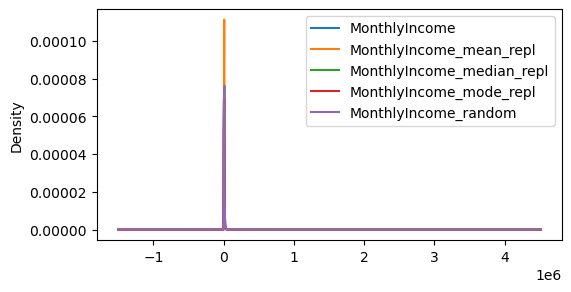

In [34]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
training_data["MonthlyIncome"].plot(kind="kde", ax=ax, legend="MonthlyIncome")
training_data["MonthlyIncome_mean_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_mean_repl")
training_data["MonthlyIncome_median_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_median_repl")
training_data["MonthlyIncome_mode_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_mode_repl")
training_data["MonthlyIncome_random"].plot(kind="kde", ax=ax, legend="MonthlyIncome_random")
plt.show()

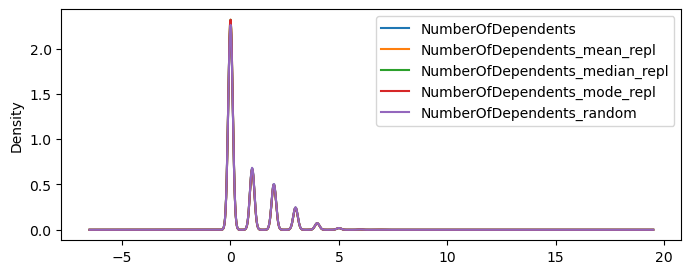

In [35]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1)
training_data["NumberOfDependents"].plot(kind="kde", ax=ax, legend="NumberOfDependents")
training_data["NumberOfDependents_mean_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_mean_repl")
training_data["NumberOfDependents_median_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_median_repl")
training_data["NumberOfDependents_mode_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_mode_repl")
training_data["NumberOfDependents_random"].plot(kind="kde", ax=ax, legend="NumberOfDependents_random")
plt.show()

In [36]:
a = []
for col in training_data.columns:
    if col in ["MonthlyIncome", "MonthlyIncome_mean_repl", "MonthlyIncome_median_repl", "MonthlyIncome_mode_repl", 
               "MonthlyIncome_random", "NumberOfDependents", "NumberOfDependents_mean_repl", "NumberOfDependents_median_repl",
               "NumberOfDependents_mode_repl", "NumberOfDependents_random"]:
        mean, median, mode = mean_median_mode(training_data, col)
        std = training_data[col].std()
        #print(col, mean, median, mode, std)
        a.append([col, mean, median, mode, std])
a = pd.DataFrame(a, columns=["Column_Name", "Mean", "Median", "Mode", "Std"])
a

,Column_Name,Mean,Median,Mode,Std
0,MonthlyIncome,6668,5400,5000,14707.956849
1,NumberOfDependents,0,0,0,1.113556
2,MonthlyIncome_mean_repl,6668,6600,6668,13169.537835
3,MonthlyIncome_median_repl,6416,5400,5400,13179.243193
4,MonthlyIncome_mode_repl,6337,5000,5000,13186.325220
5,MonthlyIncome_random,6641,5400,5000,13499.900536
6,NumberOfDependents_mean_repl,0,0,0,1.105475
7,NumberOfDependents_median_repl,0,0,0,1.105475
8,NumberOfDependents_mode_repl,0,0,0,1.105475
9,NumberOfDependents_random,0,0,0,1.113186


In [37]:
training_data = training_data.drop(['MonthlyIncome', "NumberOfDependents", 'MonthlyIncome_mean_repl', 'MonthlyIncome_median_repl', 'MonthlyIncome_mode_repl', 'NumberOfDependents_mean_repl', 'NumberOfDependents_median_repl', 'NumberOfDependents_mode_repl'], axis=1)

In [38]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,MonthlyIncome_random,NumberOfDependents_random
135928,0.0,0.224926,54.0,Male,West,Rented,Non-officer,Professional,0.0,0.121769,14.0,0.0,0.0,0.0,Good,7078.0,0.0
95567,0.0,0.655320,56.0,Female,Central,Rented,Non-officer,Graduate,0.0,0.210929,7.0,0.0,0.0,0.0,Good,5617.0,1.0
80798,0.0,1.000000,27.0,Female,Central,Rented,Officer2,Professional,0.0,326.000000,1.0,0.0,0.0,0.0,Good,10666.0,1.0
98512,0.0,0.543760,42.0,Male,Central,Ownhouse,Non-officer,Graduate,0.0,1965.000000,11.0,0.0,1.0,0.0,Good,11036.0,3.0
66964,0.0,0.054019,48.0,Male,Central,Ownhouse,Officer2,Professional,0.0,0.233234,7.0,0.0,1.0,0.0,Good,8051.0,0.0


In [39]:
training_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_random                    0
NumberOfDependents_random               0
dtype: int64

In [40]:
test_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
19470,0.0,0.005088,59.0,Female,North,NaN,Ownhouse,Officer1,Post-Grad,0.0,1789.000000,22.0,0.0,2.0,0.0,3.0,Good
26019,0.0,0.880458,49.0,Female,North,9250.0,Rented,Self_Emp,Graduate,0.0,0.367528,11.0,0.0,1.0,0.0,3.0,Good
146636,0.0,0.036962,46.0,Male,South,13333.0,Ownhouse,Self_Emp,Professional,0.0,0.322784,7.0,0.0,1.0,0.0,0.0,Good
2258,0.0,0.032604,66.0,Male,South,5200.0,Ownhouse,Self_Emp,PhD,0.0,0.641992,9.0,0.0,0.0,0.0,0.0,Good
133966,0.0,0.877463,74.0,Male,West,15400.0,Ownhouse,Officer1,Professional,3.0,0.515811,12.0,0.0,1.0,0.0,0.0,Good


In [41]:
test_data["MonthlyIncome_random"] = test_data["MonthlyIncome"].copy()
sample = sample_training_data["MonthlyIncome"].dropna().sample(test_data["MonthlyIncome"].isnull().sum(), random_state=12)
sample.index = test_data[test_data["MonthlyIncome"].isnull()].index
test_data.loc[test_data["MonthlyIncome"].isnull(), "MonthlyIncome_random"] = sample

In [43]:
test_data["NumberOfDependents_random"] = test_data["NumberOfDependents"].copy()
sample = sample_training_data["NumberOfDependents"].dropna().sample(test_data["NumberOfDependents"].isnull().sum(), random_state=12)
sample.index = test_data[test_data["NumberOfDependents"].isnull()].index
test_data.loc[test_data["NumberOfDependents"].isnull(), "NumberOfDependents_random"] = sample

In [44]:
test_data = test_data.drop(['MonthlyIncome', "NumberOfDependents"], axis=1)

In [45]:
test_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_random                    0
NumberOfDependents_random               0
dtype: int64

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15001 entries, 19470 to 104467
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NPA Status                            15001 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  15001 non-null  float64
 2   age                                   15001 non-null  float64
 3   Gender                                15001 non-null  object 
 4   Region                                15001 non-null  object 
 5   Rented_OwnHouse                       15001 non-null  object 
 6   Occupation                            15001 non-null  object 
 7   Education                             15001 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  15001 non-null  float64
 9   DebtRatio                             15001 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       15001 non-null  float64
 11  NumberOfTi

In [47]:
test_data["NumberOfDependents_random"] = pd.to_numeric(test_data["NumberOfDependents_random"], downcast=None)

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15001 entries, 19470 to 104467
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NPA Status                            15001 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  15001 non-null  float64
 2   age                                   15001 non-null  float64
 3   Gender                                15001 non-null  object 
 4   Region                                15001 non-null  object 
 5   Rented_OwnHouse                       15001 non-null  object 
 6   Occupation                            15001 non-null  object 
 7   Education                             15001 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  15001 non-null  float64
 9   DebtRatio                             15001 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       15001 non-null  float64
 11  NumberOfTi

### Null values are now filled in both training as well as test data

#### Separating the numerical and categorical data for further operations now.

In [49]:
training_data_num = training_data.select_dtypes(exclude="object")
training_data_cat = training_data.select_dtypes(include="object")

In [50]:
training_data_num.head(1)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,NumberOfDependents_random
135928,0.0,0.224926,54.0,0.0,0.121769,14.0,0.0,0.0,0.0,7078.0,0.0


In [51]:
training_data_cat.head(1)

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
135928,Male,West,Rented,Non-officer,Professional,Good


In [52]:
test_data_num = test_data.select_dtypes(exclude="object")
test_data_cat = test_data.select_dtypes(include="object")

In [53]:
test_data_num.head(1)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,NumberOfDependents_random
19470,0.0,0.005088,59.0,0.0,1789.0,22.0,0.0,2.0,0.0,10666.0,3.0


In [54]:
test_data_cat.head(1)

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
19470,Female,North,Ownhouse,Officer1,Post-Grad,Good


##### Checking the distribution of numerical data.

In [55]:
training_data_num.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,NumberOfDependents_random
count,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,1.349990e+05,134999.000000
mean,0.067112,6.215304,52.298684,0.423188,353.716504,8.454892,0.267743,1.017259,0.242039,6.641210e+03,0.755643
std,0.250216,258.648786,14.763645,4.208764,2114.796502,5.148038,4.185625,1.127042,4.171181,1.349990e+04,1.113186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.029870,41.000000,0.000000,0.174979,5.000000,0.000000,0.000000,0.000000,3.400000e+03,0.000000
50%,0.000000,0.154072,52.000000,0.000000,0.366168,8.000000,0.000000,1.000000,0.000000,5.400000e+03,0.000000
75%,0.000000,0.558880,63.000000,0.000000,0.865752,11.000000,0.000000,2.000000,0.000000,8.250000e+03,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,58.000000,98.000000,54.000000,98.000000,3.008750e+06,13.000000


In [56]:
training_data_num.corr()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,NumberOfDependents_random
NPA Status,1.000000,-0.003291,-0.115425,0.125683,-0.007833,-0.030762,0.117801,-0.006760,0.102863,-0.017379,0.044516
RevolvingUtilizationOfUnsecuredLines,-0.003291,1.000000,-0.005297,-0.001305,0.001649,-0.011420,-0.001070,0.005924,-0.001131,0.006934,0.001914
age,-0.115425,-0.005297,1.000000,-0.063061,0.023295,0.147629,-0.061165,0.032008,-0.057258,0.029780,-0.206352
NumberOfTime30-59DaysPastDueNotWorse,0.125683,-0.001305,-0.063061,1.000000,-0.006257,-0.055453,0.983616,-0.030780,0.987064,-0.007744,-0.003170
DebtRatio,-0.007833,0.001649,0.023295,-0.006257,1.000000,0.048182,-0.008082,0.117655,-0.007341,-0.006163,-0.035082
NumberOfOpenCreditLinesAndLoans,-0.030762,-0.011420,0.147629,-0.055453,0.048182,1.000000,-0.080373,0.432825,-0.071511,0.078711,0.062542
NumberOfTimes90DaysLate,0.117801,-0.001070,-0.061165,0.983616,-0.008082,-0.080373,1.000000,-0.045478,0.992775,-0.009359,-0.010391
NumberRealEstateLoansOrLines,-0.006760,0.005924,0.032008,-0.030780,0.117655,0.432825,-0.045478,1.000000,-0.039985,0.108563,0.119988
NumberOfTime60-89DaysPastDueNotWorse,0.102863,-0.001131,-0.057258,0.987064,-0.007341,-0.071511,0.992775,-0.039985,1.000000,-0.008158,-0.010954
MonthlyIncome_random,-0.017379,0.006934,0.029780,-0.007744,-0.006163,0.078711,-0.009359,0.108563,-0.008158,1.000000,0.055902


In [57]:
def num_univariate(df, var):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    sns.distplot(df[var])
    plt.subplot(1,3,2)
    sns.boxplot(x=df[var])
    plt.subplot(1,3,3)
    stats.probplot(df[var], plot=plt)
    plt.show()

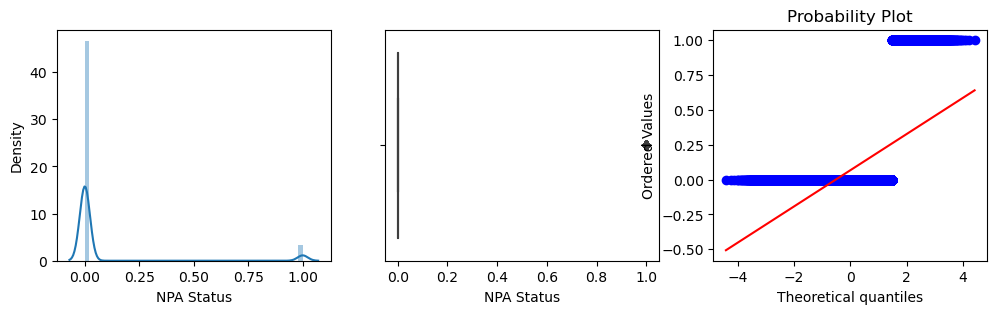

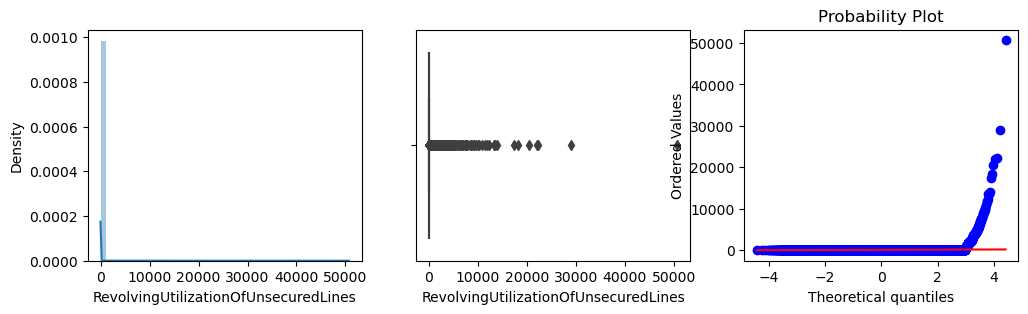

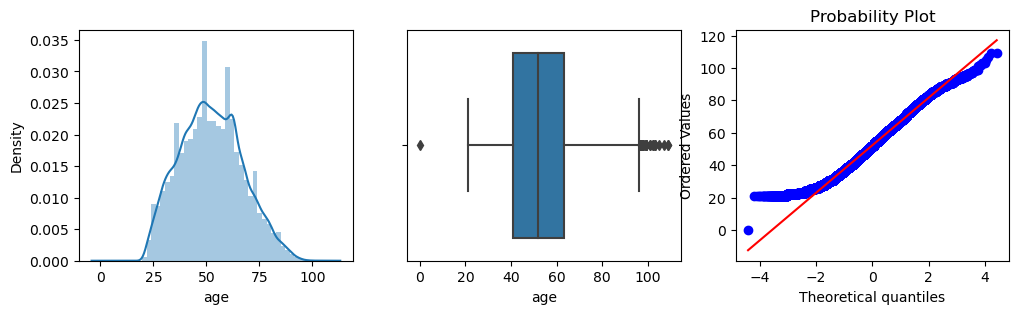

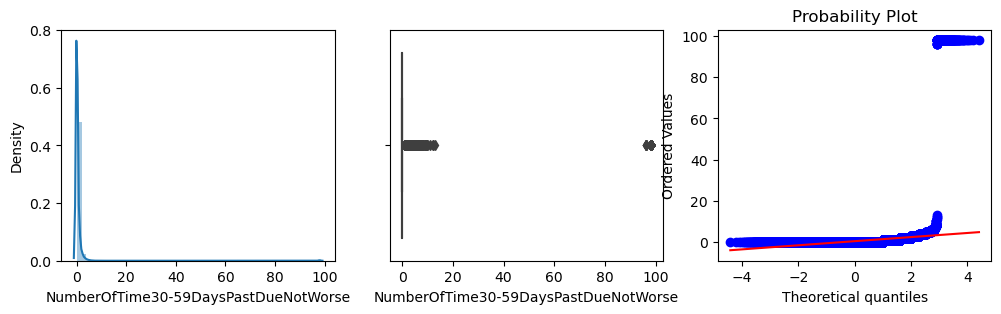

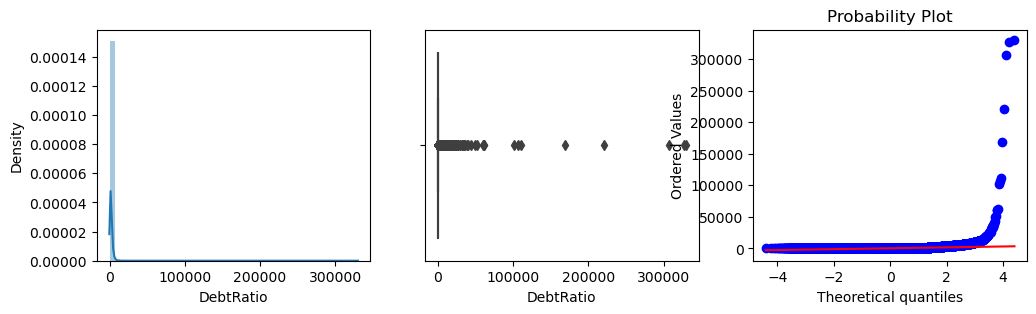

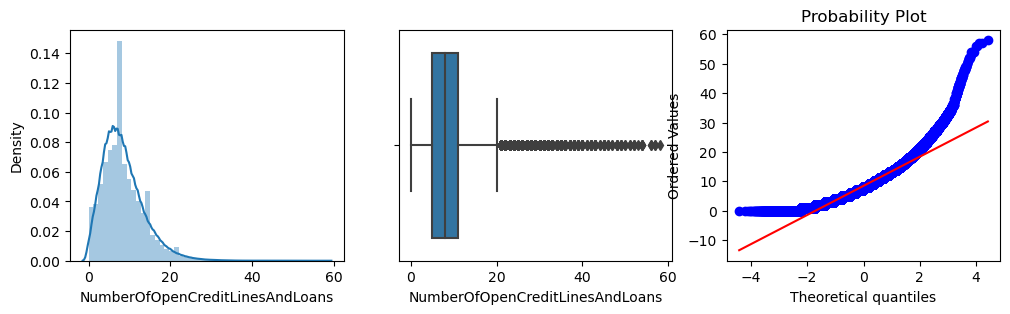

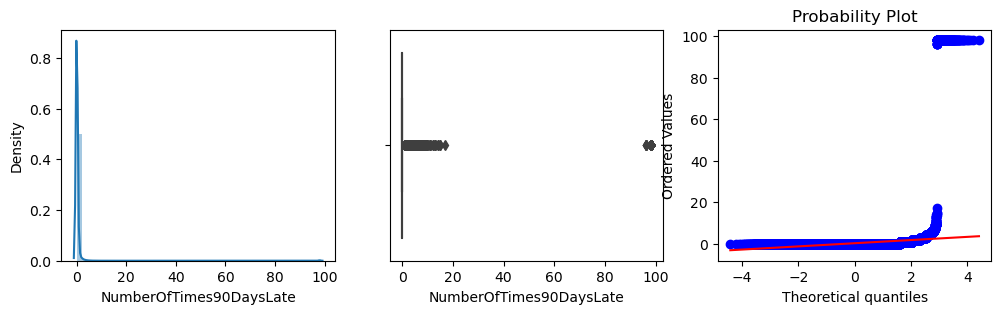

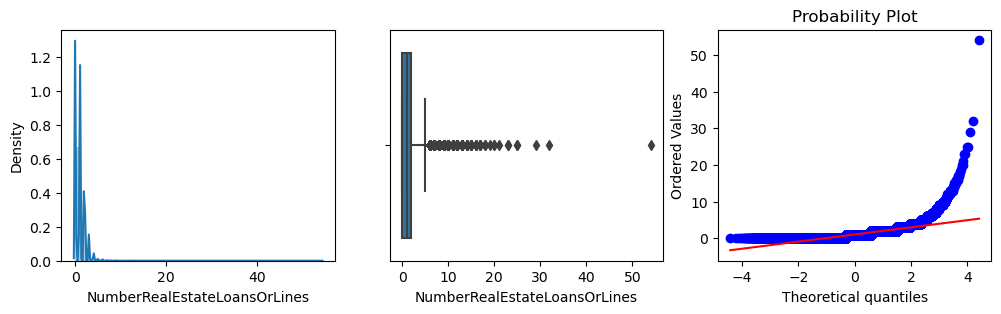

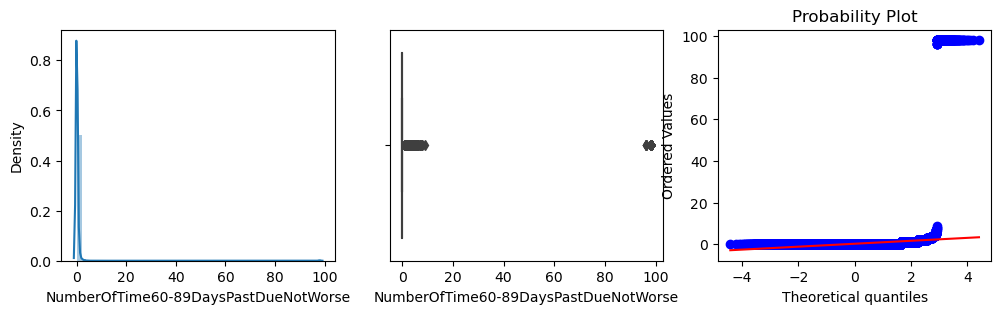

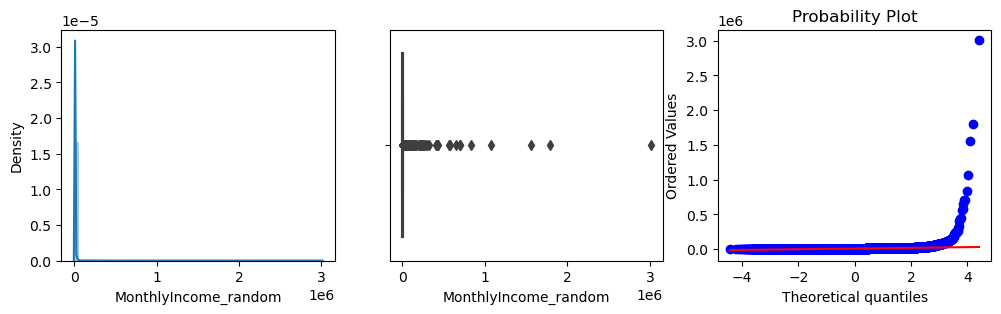

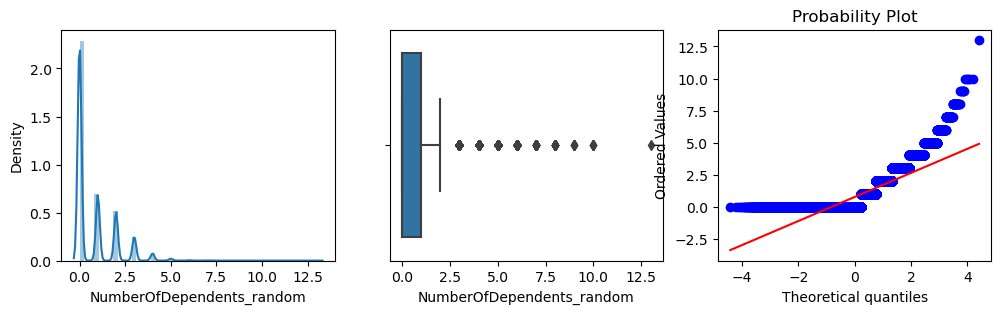

In [58]:
for col in training_data_num.columns:
    num_univariate(training_data_num, col)

In [59]:
def transformation(df, var):
    df[var+"_Yeo"], lambda_ = stats.yeojohnson(df[var])

In [60]:
for col in training_data_num.columns:
    transformation(training_data_num, col)

In [61]:
def actual_vs_transformed_distribution(df, var):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    sns.distplot(df[var])
    plt.subplot(1,3,2)
    sns.boxplot(x=df[var])
    plt.subplot(1,3,3)
    stats.probplot(df[var], plot=plt)
    plt.show()

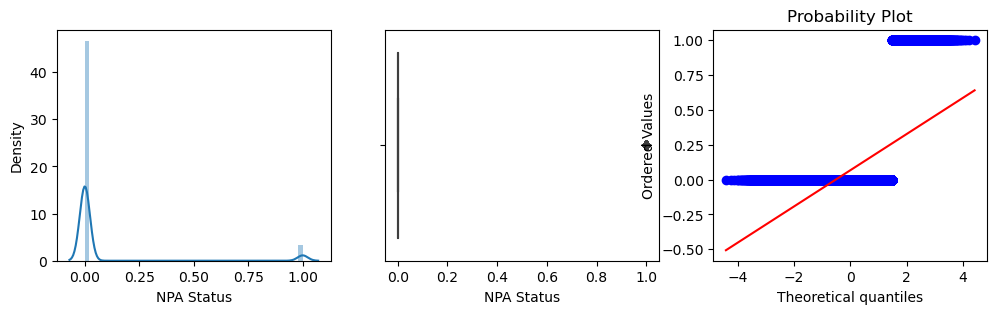

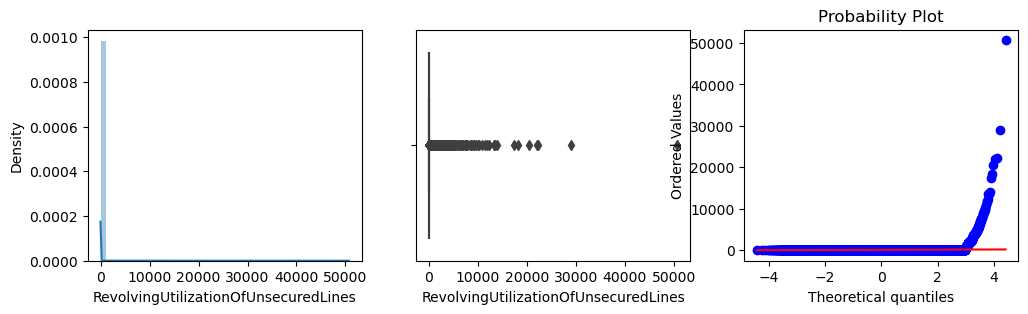

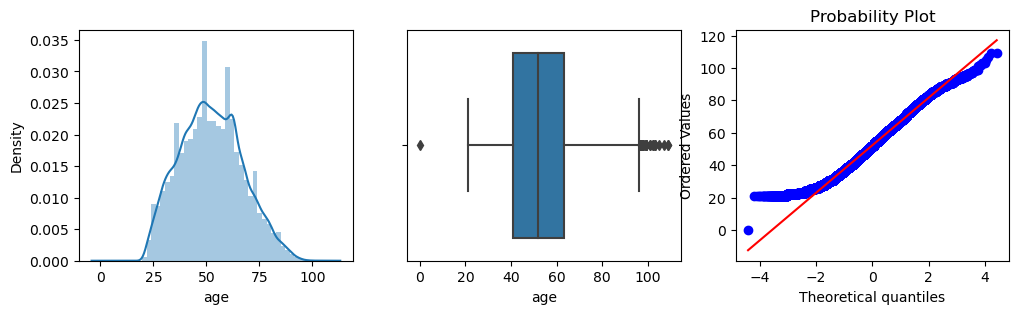

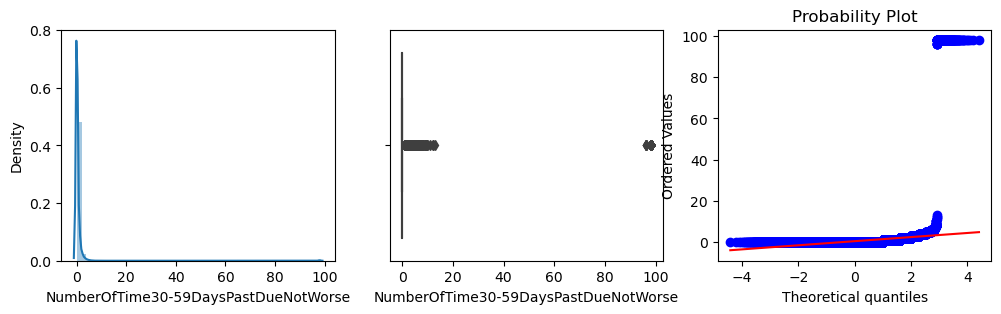

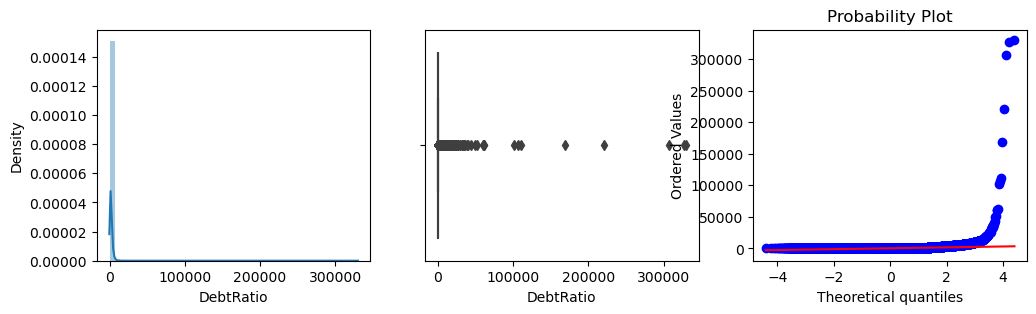

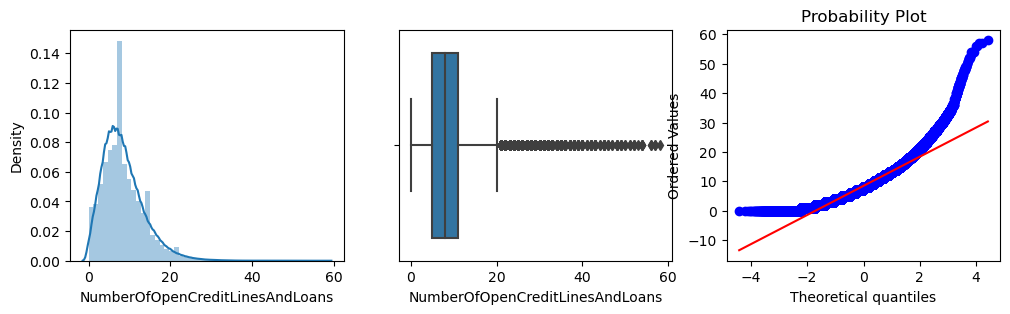

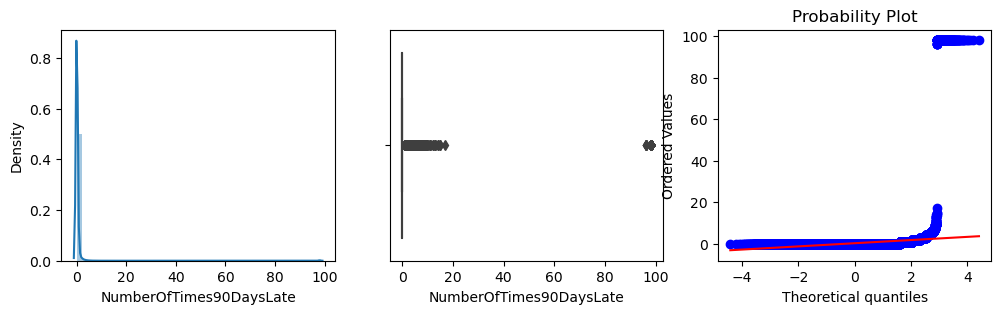

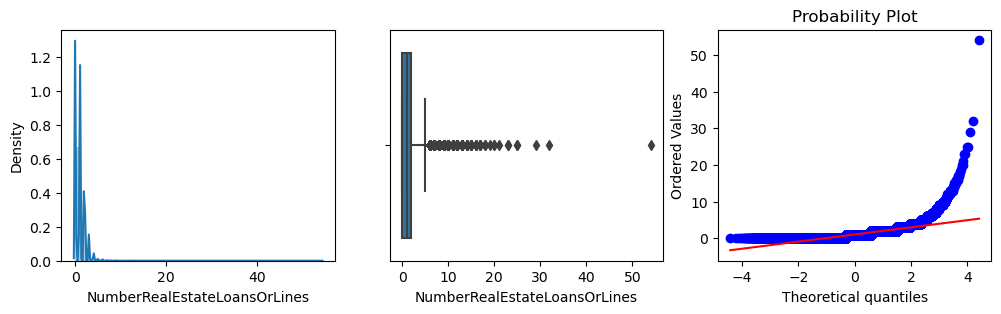

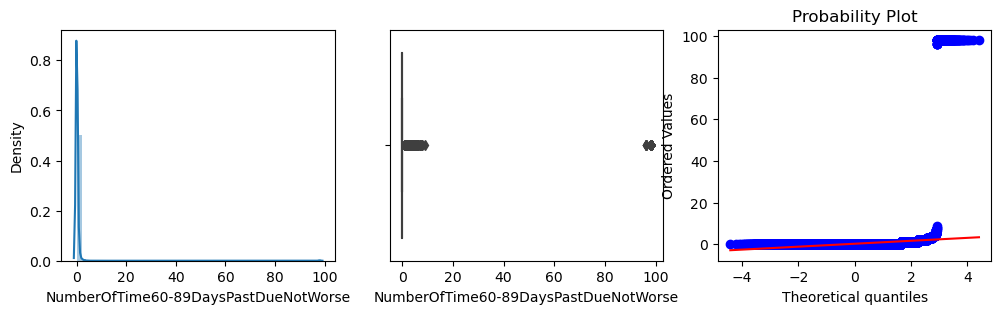

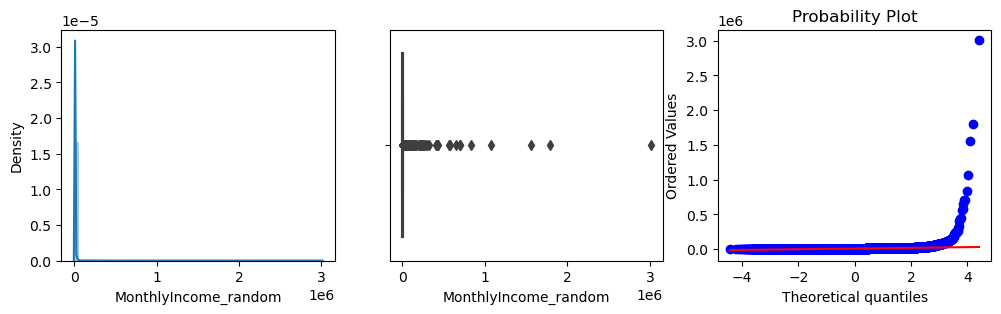

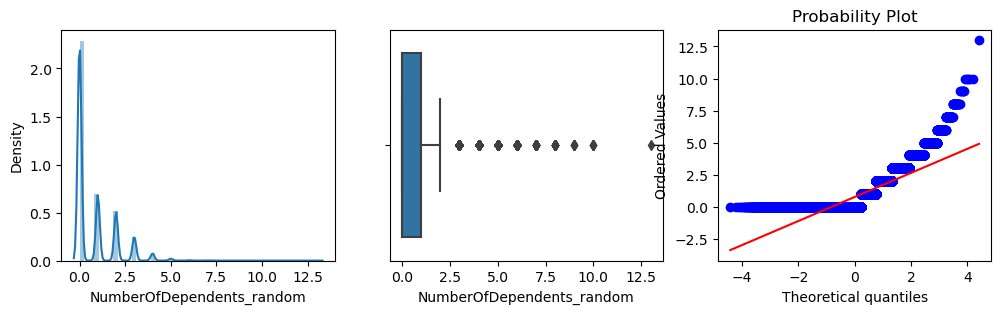

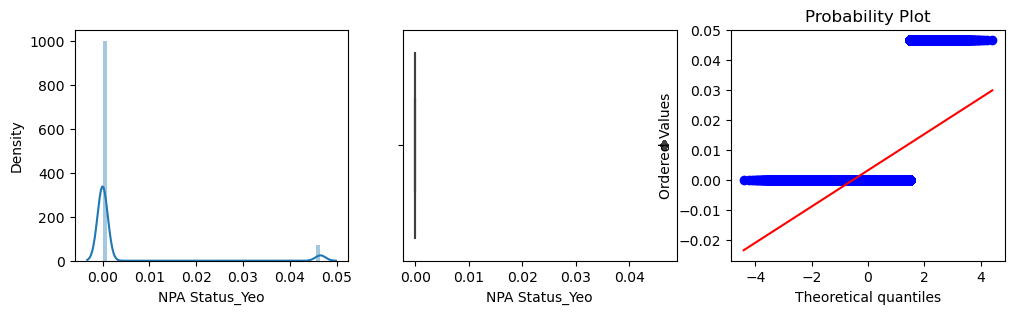

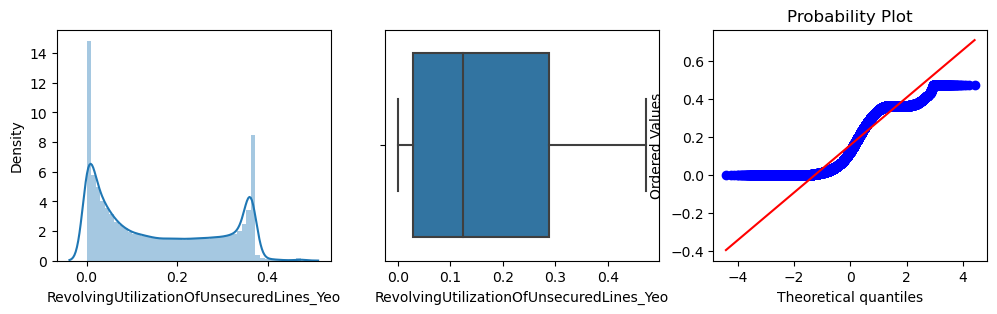

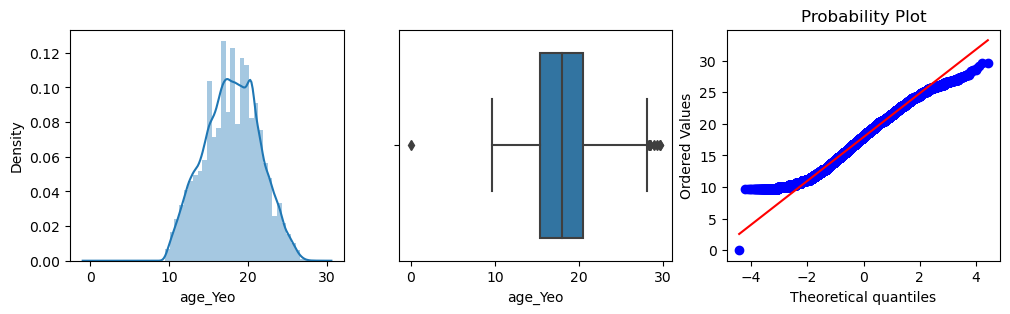

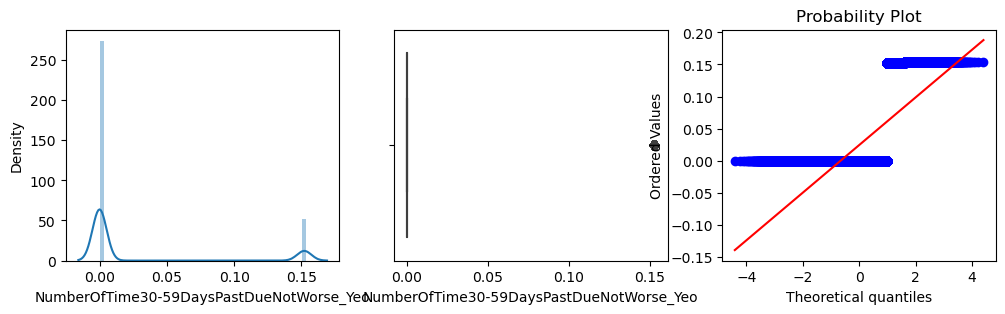

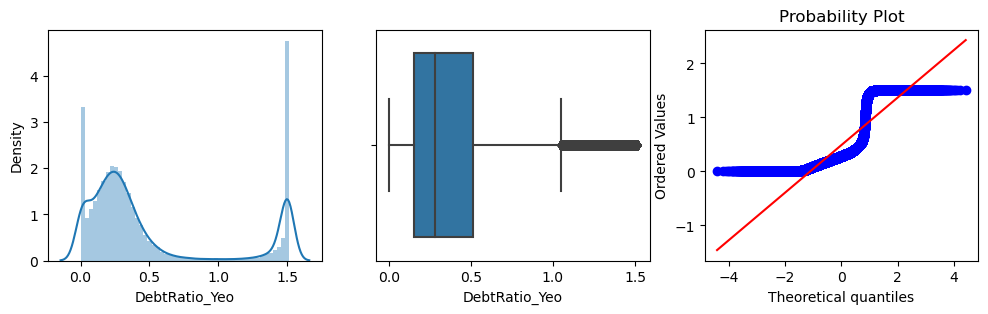

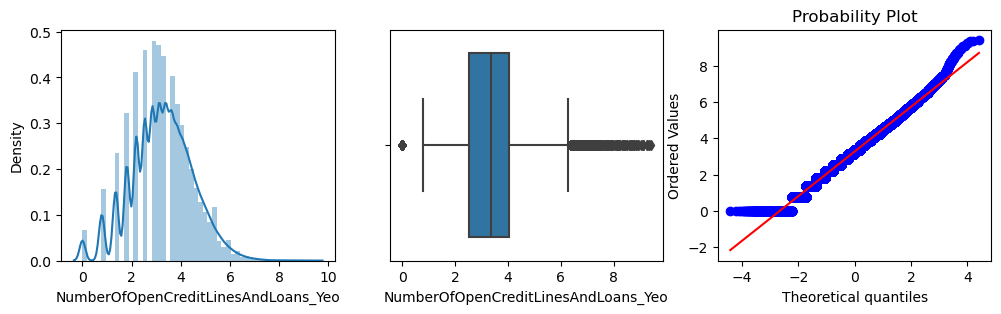

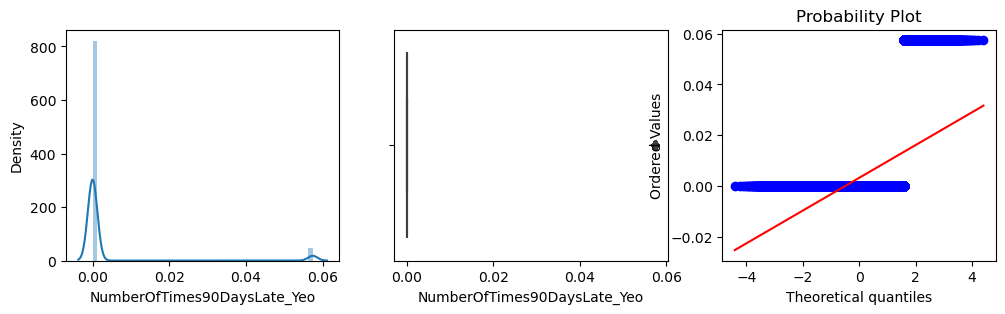

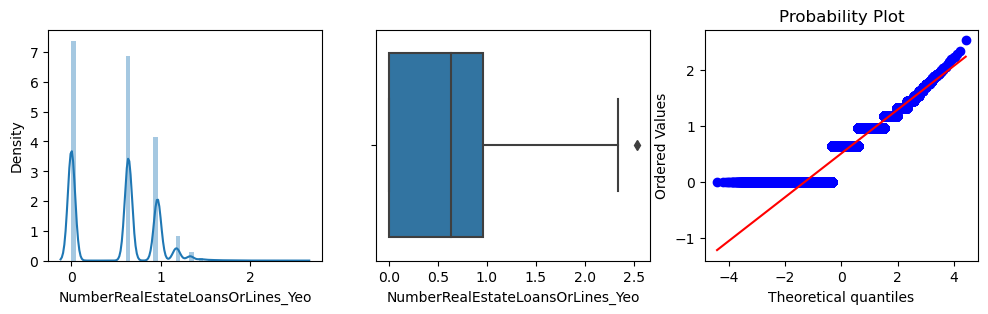

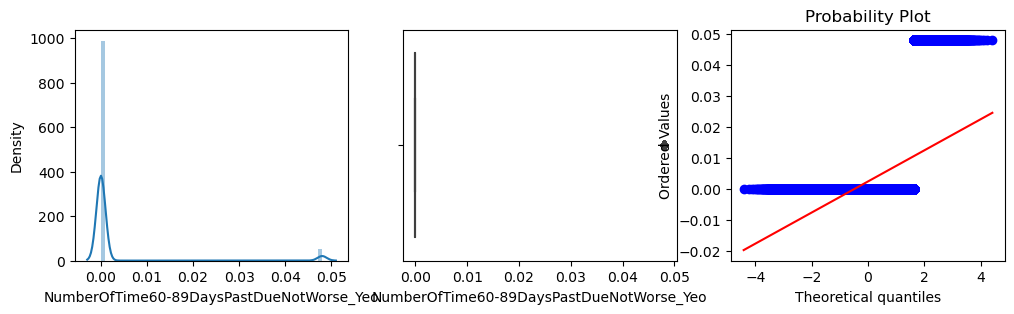

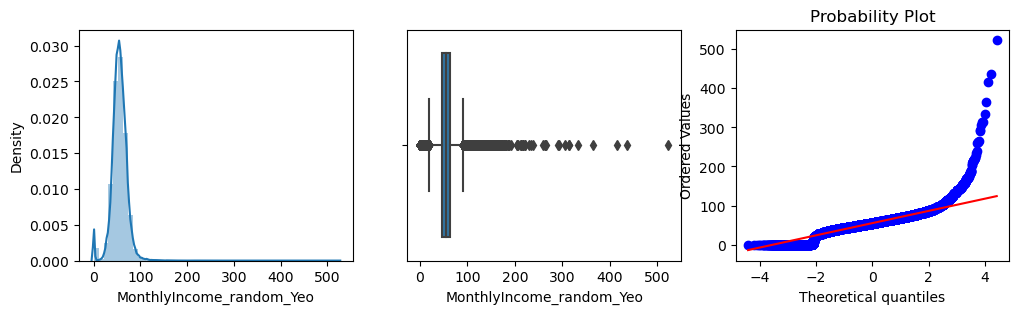

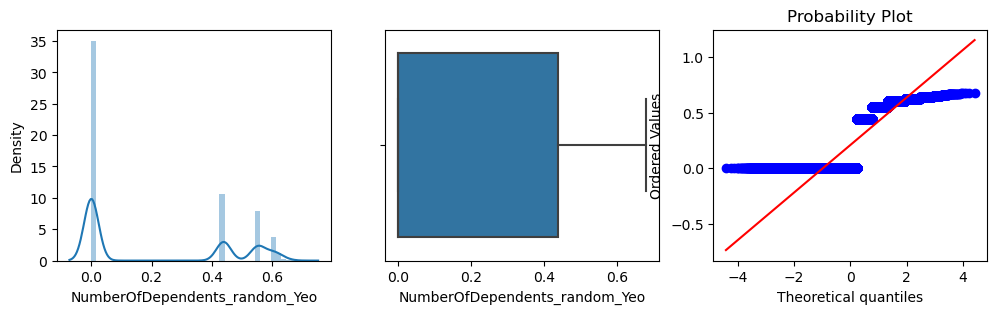

In [62]:
for col in training_data_num.columns:
    actual_vs_transformed_distribution(training_data_num, col)

In [63]:
training_data_num_updated = training_data_num.drop(['RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents_random', 'DebtRatio', 'NumberOfTime30-59DaysPastDueNotWorse', 'NPA Status_Yeo', 'age_Yeo', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', "NumberRealEstateLoansOrLines", 'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome_random_Yeo'], axis=1)

In [64]:
training_data_num_updated.head()

,NPA Status,age,MonthlyIncome_random,RevolvingUtilizationOfUnsecuredLines_Yeo,NumberOfTime30-59DaysPastDueNotWorse_Yeo,DebtRatio_Yeo,NumberOfOpenCreditLinesAndLoans_Yeo,NumberOfTimes90DaysLate_Yeo,NumberRealEstateLoansOrLines_Yeo,NumberOfTime60-89DaysPastDueNotWorse_Yeo,NumberOfDependents_random_Yeo
135928,0.0,54.0,7078.0,0.165022,-0.0,0.110658,4.625435,-0.0,-0.000000,-0.0,-0.000000
95567,0.0,56.0,5617.0,0.310215,-0.0,0.179794,3.114400,-0.0,-0.000000,-0.0,0.438647
80798,0.0,27.0,10666.0,0.364024,-0.0,1.482057,0.788851,-0.0,-0.000000,-0.0,0.438647
98512,0.0,42.0,11036.0,0.284277,-0.0,1.505087,4.048905,-0.0,0.636642,-0.0,0.600453
66964,0.0,48.0,8051.0,0.049794,-0.0,0.195784,3.114400,-0.0,0.636642,-0.0,-0.000000


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15001 entries, 19470 to 104467
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NPA Status                            15001 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  15001 non-null  float64
 2   age                                   15001 non-null  float64
 3   Gender                                15001 non-null  object 
 4   Region                                15001 non-null  object 
 5   Rented_OwnHouse                       15001 non-null  object 
 6   Occupation                            15001 non-null  object 
 7   Education                             15001 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  15001 non-null  float64
 9   DebtRatio                             15001 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       15001 non-null  float64
 11  NumberOfTi

In [66]:
for col in test_data_num.columns:
    transformation(test_data_num, col)

In [67]:
test_data_num.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,...,RevolvingUtilizationOfUnsecuredLines_Yeo,age_Yeo,NumberOfTime30-59DaysPastDueNotWorse_Yeo,DebtRatio_Yeo,NumberOfOpenCreditLinesAndLoans_Yeo,NumberOfTimes90DaysLate_Yeo,NumberRealEstateLoansOrLines_Yeo,NumberOfTime60-89DaysPastDueNotWorse_Yeo,MonthlyIncome_random_Yeo,NumberOfDependents_random_Yeo
19470,0.0,0.005088,59.0,0.0,1789.000000,22.0,0.0,2.0,0.0,10666.0,...,0.005048,19.563571,-0.000000,1.521197,5.820254,-0.0,0.954008,-0.0,70.921443,0.615144
26019,0.0,0.880458,49.0,0.0,0.367528,11.0,0.0,1.0,0.0,9250.0,...,0.348355,17.256184,-0.000000,0.283114,4.022465,-0.0,0.633581,-0.0,67.326489,0.615144
146636,0.0,0.036962,46.0,0.0,0.322784,7.0,0.0,1.0,0.0,13333.0,...,0.034936,16.531791,-0.000000,0.255696,3.097723,-0.0,0.633581,-0.0,76.928272,-0.000000
2258,0.0,0.032604,66.0,0.0,0.641992,9.0,0.0,0.0,0.0,5200.0,...,0.031019,21.095288,-0.000000,0.423682,3.589869,-0.0,-0.000000,-0.0,54.490603,-0.000000
133966,0.0,0.877463,74.0,3.0,0.515811,12.0,0.0,1.0,0.0,15400.0,...,0.347935,22.775733,0.147961,0.364289,4.221561,-0.0,0.633581,-0.0,81.064886,-0.000000


In [68]:
test_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_random', 'NumberOfDependents_random', 'NPA Status_Yeo',
       'RevolvingUtilizationOfUnsecuredLines_Yeo', 'age_Yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_Yeo', 'DebtRatio_Yeo',
       'NumberOfOpenCreditLinesAndLoans_Yeo', 'NumberOfTimes90DaysLate_Yeo',
       'NumberRealEstateLoansOrLines_Yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_Yeo', 'MonthlyIncome_random_Yeo',
       'NumberOfDependents_random_Yeo'],
      dtype='object')

In [69]:
test_data_num_updated = test_data_num.drop(['NPA Status_Yeo', 'RevolvingUtilizationOfUnsecuredLines', 'age_Yeo', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome_random_Yeo', 'NumberOfDependents_random'], axis=1)

In [70]:
test_data_num_updated.head()

,NPA Status,age,MonthlyIncome_random,RevolvingUtilizationOfUnsecuredLines_Yeo,NumberOfTime30-59DaysPastDueNotWorse_Yeo,DebtRatio_Yeo,NumberOfOpenCreditLinesAndLoans_Yeo,NumberOfTimes90DaysLate_Yeo,NumberRealEstateLoansOrLines_Yeo,NumberOfTime60-89DaysPastDueNotWorse_Yeo,NumberOfDependents_random_Yeo
19470,0.0,59.0,10666.0,0.005048,-0.000000,1.521197,5.820254,-0.0,0.954008,-0.0,0.615144
26019,0.0,49.0,9250.0,0.348355,-0.000000,0.283114,4.022465,-0.0,0.633581,-0.0,0.615144
146636,0.0,46.0,13333.0,0.034936,-0.000000,0.255696,3.097723,-0.0,0.633581,-0.0,-0.000000
2258,0.0,66.0,5200.0,0.031019,-0.000000,0.423682,3.589869,-0.0,-0.000000,-0.0,-0.000000
133966,0.0,74.0,15400.0,0.347935,0.147961,0.364289,4.221561,-0.0,0.633581,-0.0,-0.000000


In [71]:
training_data_num_updated.head()

,NPA Status,age,MonthlyIncome_random,RevolvingUtilizationOfUnsecuredLines_Yeo,NumberOfTime30-59DaysPastDueNotWorse_Yeo,DebtRatio_Yeo,NumberOfOpenCreditLinesAndLoans_Yeo,NumberOfTimes90DaysLate_Yeo,NumberRealEstateLoansOrLines_Yeo,NumberOfTime60-89DaysPastDueNotWorse_Yeo,NumberOfDependents_random_Yeo
135928,0.0,54.0,7078.0,0.165022,-0.0,0.110658,4.625435,-0.0,-0.000000,-0.0,-0.000000
95567,0.0,56.0,5617.0,0.310215,-0.0,0.179794,3.114400,-0.0,-0.000000,-0.0,0.438647
80798,0.0,27.0,10666.0,0.364024,-0.0,1.482057,0.788851,-0.0,-0.000000,-0.0,0.438647
98512,0.0,42.0,11036.0,0.284277,-0.0,1.505087,4.048905,-0.0,0.636642,-0.0,0.600453
66964,0.0,48.0,8051.0,0.049794,-0.0,0.195784,3.114400,-0.0,0.636642,-0.0,-0.000000


In [72]:
def quantile(df, var):
    upper = df[var].quantile(0.95)
    lower = df[var].quantile(0.05)
    return upper, lower

In [73]:
training_data_num_updated["NPA Status"].unique()

array([0., 1.])

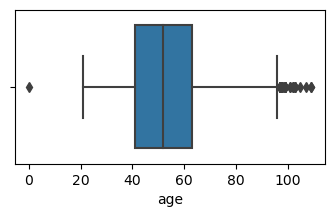

In [74]:
plt.figure(figsize=(4,2))
sns.boxplot(x=training_data_num_updated["age"])
plt.show()

In [75]:
upper, lower = quantile(training_data_num_updated, "age")

In [76]:
training_data_num_updated["age_quan"] = np.where(training_data_num_updated["age"]>upper, upper, 
                                                np.where(training_data_num_updated["age"]<lower, lower, training_data_num_updated["age"]))

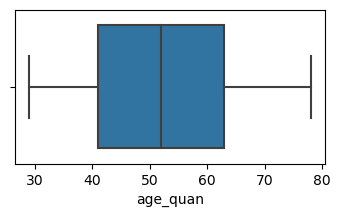

In [77]:
plt.figure(figsize=(4,2))
sns.boxplot(x=training_data_num_updated["age_quan"])
plt.show()

In [78]:
for col in training_data_num_updated.columns:
    if col in ['MonthlyIncome_random', 'RevolvingUtilizationOfUnsecuredLines_Yeo','NumberOfTime30-59DaysPastDueNotWorse_Yeo', 'DebtRatio_Yeo','NumberOfOpenCreditLinesAndLoans_Yeo', 'NumberOfTimes90DaysLate_Yeo', 'NumberRealEstateLoansOrLines_Yeo', 'NumberOfTime60-89DaysPastDueNotWorse_Yeo', 'NumberOfDependents_random_Yeo']:
        upper, lower = quantile(training_data_num_updated, col)
        training_data_num_updated[col+"_quan"] = np.where(training_data_num_updated[col]>upper, upper, 
                                                np.where(training_data_num_updated[col]<lower, lower, training_data_num_updated[col]))

In [79]:
training_data_num_updated.head()

,NPA Status,age,MonthlyIncome_random,RevolvingUtilizationOfUnsecuredLines_Yeo,NumberOfTime30-59DaysPastDueNotWorse_Yeo,DebtRatio_Yeo,NumberOfOpenCreditLinesAndLoans_Yeo,NumberOfTimes90DaysLate_Yeo,NumberRealEstateLoansOrLines_Yeo,NumberOfTime60-89DaysPastDueNotWorse_Yeo,...,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,DebtRatio_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan
135928,0.0,54.0,7078.0,0.165022,-0.0,0.110658,4.625435,-0.0,-0.000000,-0.0,...,54.0,7078.0,0.165022,-0.0,0.110658,4.625435,-0.0,-0.000000,-0.0,-0.000000
95567,0.0,56.0,5617.0,0.310215,-0.0,0.179794,3.114400,-0.0,-0.000000,-0.0,...,56.0,5617.0,0.310215,-0.0,0.179794,3.114400,-0.0,-0.000000,-0.0,0.438647
80798,0.0,27.0,10666.0,0.364024,-0.0,1.482057,0.788851,-0.0,-0.000000,-0.0,...,29.0,10666.0,0.364024,-0.0,1.482057,1.351900,-0.0,-0.000000,-0.0,0.438647
98512,0.0,42.0,11036.0,0.284277,-0.0,1.505087,4.048905,-0.0,0.636642,-0.0,...,42.0,11036.0,0.284277,-0.0,1.505087,4.048905,-0.0,0.636642,-0.0,0.600453
66964,0.0,48.0,8051.0,0.049794,-0.0,0.195784,3.114400,-0.0,0.636642,-0.0,...,48.0,8051.0,0.049794,-0.0,0.195784,3.114400,-0.0,0.636642,-0.0,-0.000000


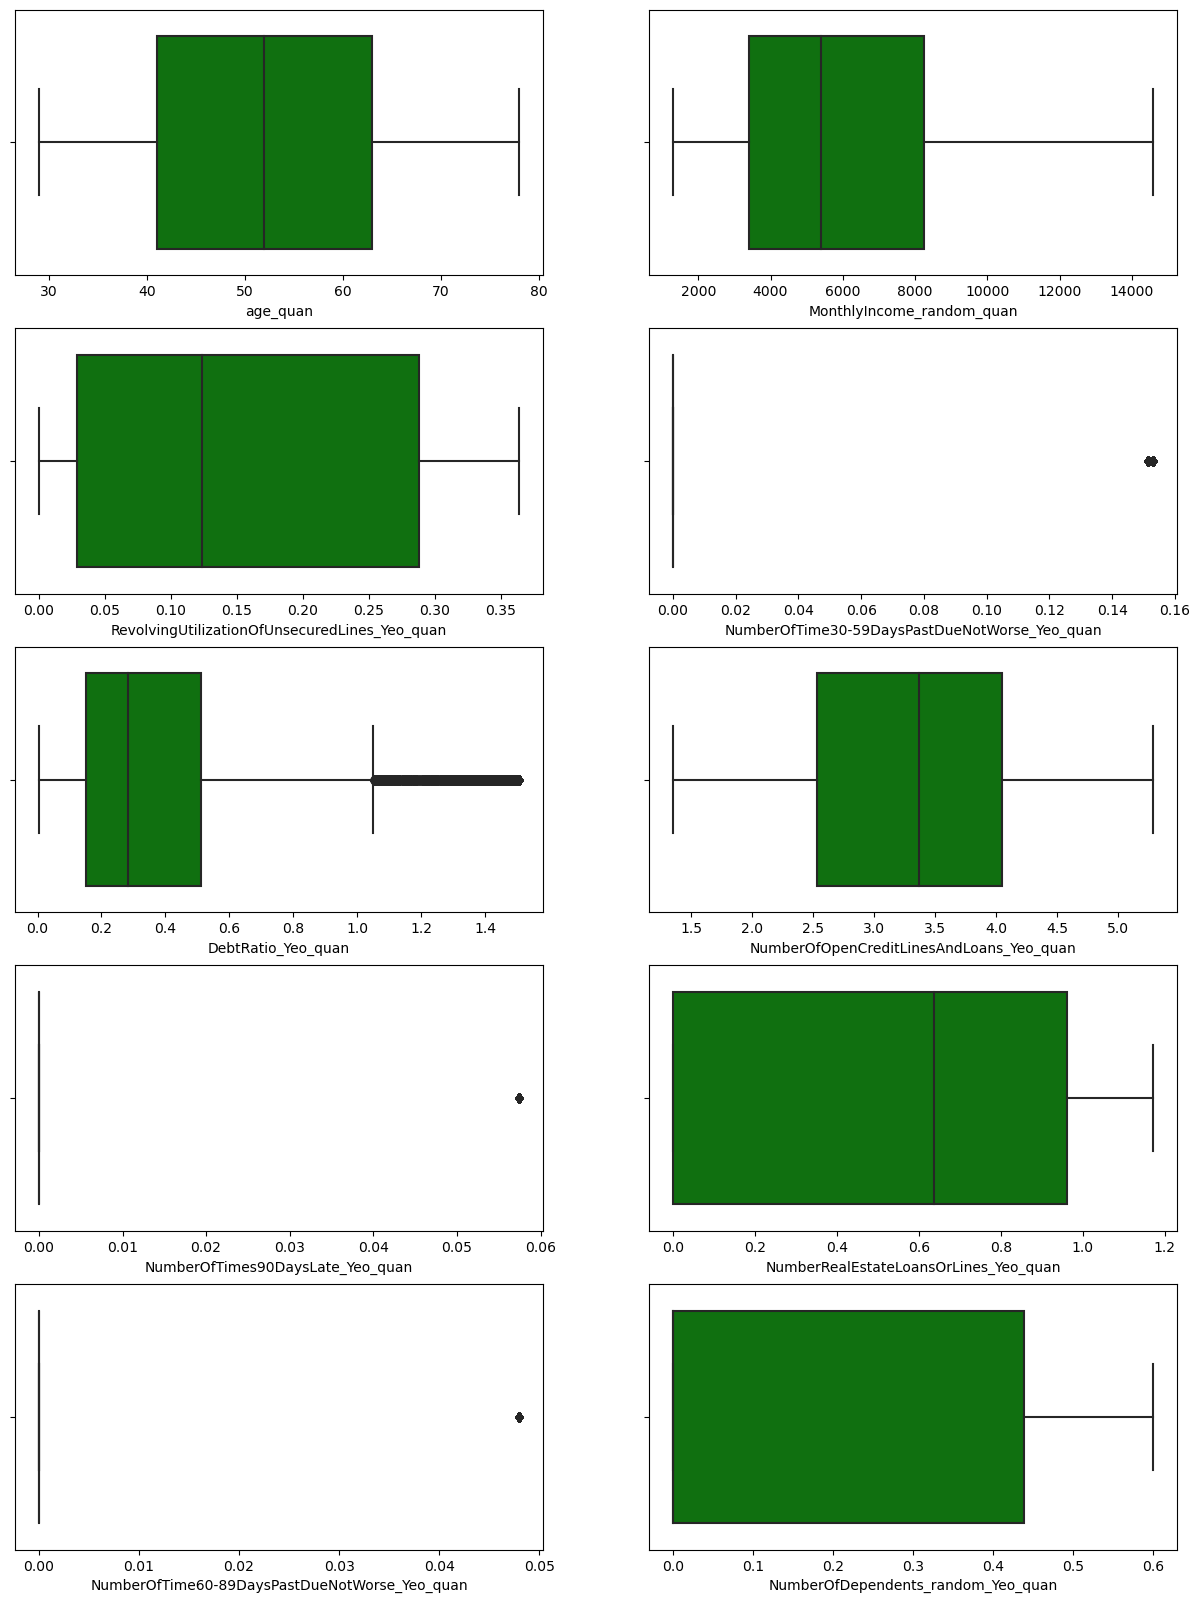

In [80]:
c = ["age_quan", "MonthlyIncome_random_quan", "RevolvingUtilizationOfUnsecuredLines_Yeo_quan", "NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan", "DebtRatio_Yeo_quan", "NumberOfOpenCreditLinesAndLoans_Yeo_quan", "NumberOfTimes90DaysLate_Yeo_quan", "NumberRealEstateLoansOrLines_Yeo_quan", "NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan", "NumberOfDependents_random_Yeo_quan"]
fig , ax = plt.subplots(5 , 2 , figsize=(15,20))
for i,subplot in zip(c, ax.flatten()):
    sns.boxplot(x = training_data_num_updated[i], ax=subplot,color = 'g')

In [81]:
training_data_num_updated_no_outlier = training_data_num_updated.drop(['age', 'MonthlyIncome_random', 'RevolvingUtilizationOfUnsecuredLines_Yeo', 'NumberOfTime30-59DaysPastDueNotWorse_Yeo', 'DebtRatio_Yeo', 'NumberOfOpenCreditLinesAndLoans_Yeo', 'NumberOfTimes90DaysLate_Yeo', 'NumberRealEstateLoansOrLines_Yeo', 'NumberOfTime60-89DaysPastDueNotWorse_Yeo', 'NumberOfDependents_random_Yeo'], axis=1)

In [82]:
training_data_num_updated_no_outlier.head()

,NPA Status,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,DebtRatio_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan
135928,0.0,54.0,7078.0,0.165022,-0.0,0.110658,4.625435,-0.0,-0.000000,-0.0,-0.000000
95567,0.0,56.0,5617.0,0.310215,-0.0,0.179794,3.114400,-0.0,-0.000000,-0.0,0.438647
80798,0.0,29.0,10666.0,0.364024,-0.0,1.482057,1.351900,-0.0,-0.000000,-0.0,0.438647
98512,0.0,42.0,11036.0,0.284277,-0.0,1.505087,4.048905,-0.0,0.636642,-0.0,0.600453
66964,0.0,48.0,8051.0,0.049794,-0.0,0.195784,3.114400,-0.0,0.636642,-0.0,-0.000000


In [83]:
training_data_num_updated_no_outlier.isnull().sum()

NPA Status                                       0
age_quan                                         0
MonthlyIncome_random_quan                        0
RevolvingUtilizationOfUnsecuredLines_Yeo_quan    0
NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan    0
DebtRatio_Yeo_quan                               0
NumberOfOpenCreditLinesAndLoans_Yeo_quan         0
NumberOfTimes90DaysLate_Yeo_quan                 0
NumberRealEstateLoansOrLines_Yeo_quan            0
NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan    0
NumberOfDependents_random_Yeo_quan               0
dtype: int64

In [84]:
for col in test_data_num_updated.columns:
    if col in ["age", 'MonthlyIncome_random', 'RevolvingUtilizationOfUnsecuredLines_Yeo','NumberOfTime30-59DaysPastDueNotWorse_Yeo', 'DebtRatio_Yeo','NumberOfOpenCreditLinesAndLoans_Yeo', 'NumberOfTimes90DaysLate_Yeo', 'NumberRealEstateLoansOrLines_Yeo', 'NumberOfTime60-89DaysPastDueNotWorse_Yeo', 'NumberOfDependents_random_Yeo']:
        upper, lower = quantile(training_data_num_updated, col)
        test_data_num_updated[col+"_quan"] = np.where(test_data_num_updated[col]>upper, upper, 
                                                np.where(test_data_num_updated[col]<lower, lower, test_data_num_updated[col]))

In [85]:
test_data_num_updated_no_outlier = test_data_num_updated.drop(["age", 'MonthlyIncome_random', 'RevolvingUtilizationOfUnsecuredLines_Yeo','NumberOfTime30-59DaysPastDueNotWorse_Yeo', 'DebtRatio_Yeo','NumberOfOpenCreditLinesAndLoans_Yeo', 'NumberOfTimes90DaysLate_Yeo', 'NumberRealEstateLoansOrLines_Yeo', 'NumberOfTime60-89DaysPastDueNotWorse_Yeo', 'NumberOfDependents_random_Yeo'], axis=1)

In [86]:
test_data_num_updated_no_outlier.head()

,NPA Status,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,DebtRatio_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan
19470,0.0,59.0,10666.0,0.005048,-0.000000,1.506460,5.289711,-0.0,0.954008,-0.0,0.600453
26019,0.0,49.0,9250.0,0.348355,-0.000000,0.283114,4.022465,-0.0,0.633581,-0.0,0.600453
146636,0.0,46.0,13333.0,0.034936,-0.000000,0.255696,3.097723,-0.0,0.633581,-0.0,-0.000000
2258,0.0,66.0,5200.0,0.031019,-0.000000,0.423682,3.589869,-0.0,-0.000000,-0.0,-0.000000
133966,0.0,74.0,14591.1,0.347935,0.147961,0.364289,4.221561,-0.0,0.633581,-0.0,-0.000000


# Working on Categorical data now

In [87]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
135928,Male,West,Rented,Non-officer,Professional,Good
95567,Female,Central,Rented,Non-officer,Graduate,Good
80798,Female,Central,Rented,Officer2,Professional,Good
98512,Male,Central,Ownhouse,Non-officer,Graduate,Good
66964,Male,Central,Ownhouse,Officer2,Professional,Good


In [88]:
test_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
19470,Female,North,Ownhouse,Officer1,Post-Grad,Good
26019,Female,North,Rented,Self_Emp,Graduate,Good
146636,Male,South,Ownhouse,Self_Emp,Professional,Good
2258,Male,South,Ownhouse,Self_Emp,PhD,Good
133966,Male,West,Ownhouse,Officer1,Professional,Good


In [89]:
training_data_cat.isnull().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
dtype: int64

In [90]:
training_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134999 entries, 135928 to 40177
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Gender           134999 non-null  object
 1   Region           134999 non-null  object
 2   Rented_OwnHouse  134999 non-null  object
 3   Occupation       134999 non-null  object
 4   Education        134999 non-null  object
 5   Good_Bad         134999 non-null  object
dtypes: object(6)
memory usage: 7.2+ MB


In [91]:
test_data_cat.isnull().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
dtype: int64

In [92]:
test_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15001 entries, 19470 to 104467
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           15001 non-null  object
 1   Region           15001 non-null  object
 2   Rented_OwnHouse  15001 non-null  object
 3   Occupation       15001 non-null  object
 4   Education        15001 non-null  object
 5   Good_Bad         15001 non-null  object
dtypes: object(6)
memory usage: 820.4+ KB


In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [94]:
label = LabelEncoder()
one = OneHotEncoder(categories="auto", drop="first")
order = OrdinalEncoder()

In [95]:
a = one.fit_transform(training_data_cat[["Gender", "Rented_OwnHouse", "Region"]])
a = a.toarray()
a = pd.DataFrame(a, index=training_data_cat.index)
a.columns = one.get_feature_names_out()

In [96]:
b = order.fit_transform(training_data_cat[["Occupation", "Education"]])
b = pd.DataFrame(b, index=training_data_cat.index)
b.columns = ["Occupation", "Education"]

In [97]:
c = label.fit_transform(training_data_cat["Good_Bad"])
c = pd.DataFrame(c, index=training_data_cat.index)
c.columns = ["Good_Bad"]
c.head()

,Good_Bad
135928,1
95567,1
80798,1
98512,1
66964,1


In [98]:
training_data_cat_transformed = pd.concat([a,b,c], axis=1)

In [99]:
training_data_cat_transformed.head()

,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupation,Education,Good_Bad
135928,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
95567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
80798,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,1
98512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66964,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1


In [100]:
training_data_cat_transformed.isnull().sum()

Gender_Male               0
Rented_OwnHouse_Rented    0
Region_East               0
Region_North              0
Region_South              0
Region_West               0
Occupation                0
Education                 0
Good_Bad                  0
dtype: int64

In [101]:
d = one.transform(test_data_cat[["Gender", "Rented_OwnHouse", "Region"]])
d = d.toarray()
d = pd.DataFrame(d, index=test_data_cat.index)
d.columns = one.get_feature_names_out()

In [102]:
e = order.transform(test_data_cat[["Occupation", "Education"]])
e = pd.DataFrame(e, index=test_data_cat.index)
e.columns = ["Occupation", "Education"]

In [103]:
f = label.transform(test_data_cat["Good_Bad"])
f = pd.DataFrame(f, index=test_data_cat.index)
f.columns = ["Good_Bad"]
f.head()

,Good_Bad
19470,1
26019,1
146636,1
2258,1
133966,1


In [104]:
test_data_cat_transformed = pd.concat([d,e,f], axis=1)
test_data_cat_transformed.head()

,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupation,Education,Good_Bad
19470,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1
26019,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1
146636,1.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,1
2258,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1
133966,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1


In [105]:
final_train_data = pd.concat([training_data_num_updated_no_outlier.reset_index(), training_data_cat_transformed.reset_index()], axis=1)

In [106]:
final_train_data.isnull().sum()

index                                            0
NPA Status                                       0
age_quan                                         0
MonthlyIncome_random_quan                        0
RevolvingUtilizationOfUnsecuredLines_Yeo_quan    0
NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan    0
DebtRatio_Yeo_quan                               0
NumberOfOpenCreditLinesAndLoans_Yeo_quan         0
NumberOfTimes90DaysLate_Yeo_quan                 0
NumberRealEstateLoansOrLines_Yeo_quan            0
NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan    0
NumberOfDependents_random_Yeo_quan               0
index                                            0
Gender_Male                                      0
Rented_OwnHouse_Rented                           0
Region_East                                      0
Region_North                                     0
Region_South                                     0
Region_West                                      0
Occupation                     

In [107]:
final_train_data = final_train_data.drop(["index", "index"], axis=1)

In [108]:
final_train_data.isnull().sum()

NPA Status                                       0
age_quan                                         0
MonthlyIncome_random_quan                        0
RevolvingUtilizationOfUnsecuredLines_Yeo_quan    0
NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan    0
DebtRatio_Yeo_quan                               0
NumberOfOpenCreditLinesAndLoans_Yeo_quan         0
NumberOfTimes90DaysLate_Yeo_quan                 0
NumberRealEstateLoansOrLines_Yeo_quan            0
NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan    0
NumberOfDependents_random_Yeo_quan               0
Gender_Male                                      0
Rented_OwnHouse_Rented                           0
Region_East                                      0
Region_North                                     0
Region_South                                     0
Region_West                                      0
Occupation                                       0
Education                                        0
Good_Bad                       

In [109]:
final_train_data.head()

,NPA Status,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,DebtRatio_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupation,Education,Good_Bad
0,0.0,54.0,7078.0,0.165022,-0.0,0.110658,4.625435,-0.0,-0.000000,-0.0,-0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
1,0.0,56.0,5617.0,0.310215,-0.0,0.179794,3.114400,-0.0,-0.000000,-0.0,0.438647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,29.0,10666.0,0.364024,-0.0,1.482057,1.351900,-0.0,-0.000000,-0.0,0.438647,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,1
3,0.0,42.0,11036.0,0.284277,-0.0,1.505087,4.048905,-0.0,0.636642,-0.0,0.600453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,48.0,8051.0,0.049794,-0.0,0.195784,3.114400,-0.0,0.636642,-0.0,-0.000000,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1


In [110]:
final_train_data.columns

Index(['NPA Status', 'age_quan', 'MonthlyIncome_random_quan',
       'RevolvingUtilizationOfUnsecuredLines_Yeo_quan',
       'NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan', 'DebtRatio_Yeo_quan',
       'NumberOfOpenCreditLinesAndLoans_Yeo_quan',
       'NumberOfTimes90DaysLate_Yeo_quan',
       'NumberRealEstateLoansOrLines_Yeo_quan',
       'NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan',
       'NumberOfDependents_random_Yeo_quan', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupation', 'Education', 'Good_Bad'],
      dtype='object')

In [111]:
final_test_data = pd.concat([test_data_num_updated_no_outlier.reset_index(), test_data_cat_transformed.reset_index()], axis=1)

In [112]:
final_test_data.isnull().sum()

index                                            0
NPA Status                                       0
age_quan                                         0
MonthlyIncome_random_quan                        0
RevolvingUtilizationOfUnsecuredLines_Yeo_quan    0
NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan    0
DebtRatio_Yeo_quan                               0
NumberOfOpenCreditLinesAndLoans_Yeo_quan         0
NumberOfTimes90DaysLate_Yeo_quan                 0
NumberRealEstateLoansOrLines_Yeo_quan            0
NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan    0
NumberOfDependents_random_Yeo_quan               0
index                                            0
Gender_Male                                      0
Rented_OwnHouse_Rented                           0
Region_East                                      0
Region_North                                     0
Region_South                                     0
Region_West                                      0
Occupation                     

In [113]:
final_test_data = final_test_data.drop(["index", "index"], axis=1)

In [114]:
final_test_data.head(1)

,NPA Status,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,DebtRatio_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupation,Education,Good_Bad
0,0.0,59.0,10666.0,0.005048,-0.0,1.50646,5.289711,-0.0,0.954008,-0.0,0.600453,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1


In [115]:
final_test_data.columns

Index(['NPA Status', 'age_quan', 'MonthlyIncome_random_quan',
       'RevolvingUtilizationOfUnsecuredLines_Yeo_quan',
       'NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan', 'DebtRatio_Yeo_quan',
       'NumberOfOpenCreditLinesAndLoans_Yeo_quan',
       'NumberOfTimes90DaysLate_Yeo_quan',
       'NumberRealEstateLoansOrLines_Yeo_quan',
       'NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan',
       'NumberOfDependents_random_Yeo_quan', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupation', 'Education', 'Good_Bad'],
      dtype='object')

In [116]:
final_test_data.isnull().sum()

NPA Status                                       0
age_quan                                         0
MonthlyIncome_random_quan                        0
RevolvingUtilizationOfUnsecuredLines_Yeo_quan    0
NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan    0
DebtRatio_Yeo_quan                               0
NumberOfOpenCreditLinesAndLoans_Yeo_quan         0
NumberOfTimes90DaysLate_Yeo_quan                 0
NumberRealEstateLoansOrLines_Yeo_quan            0
NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan    0
NumberOfDependents_random_Yeo_quan               0
Gender_Male                                      0
Rented_OwnHouse_Rented                           0
Region_East                                      0
Region_North                                     0
Region_South                                     0
Region_West                                      0
Occupation                                       0
Education                                        0
Good_Bad                       

In [117]:
final_x_train = final_train_data.iloc[:, :-1]
final_y_train = final_train_data.iloc[:, -1]

In [118]:
final_x_test = final_test_data.iloc[:, :-1]
final_y_test = final_test_data.iloc[:, -1]

### Applying Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaling = StandardScaler()
scaling

StandardScaler()

In [121]:
final_x_train_scaled = scaling.fit_transform(final_x_train)
final_x_test_scaled = scaling.transform(final_x_test)

In [122]:
final_x_train_scaled = pd.DataFrame(final_x_train, columns=final_x_train.columns)
final_x_test_scaled = pd.DataFrame(final_x_test, columns=final_x_test.columns)

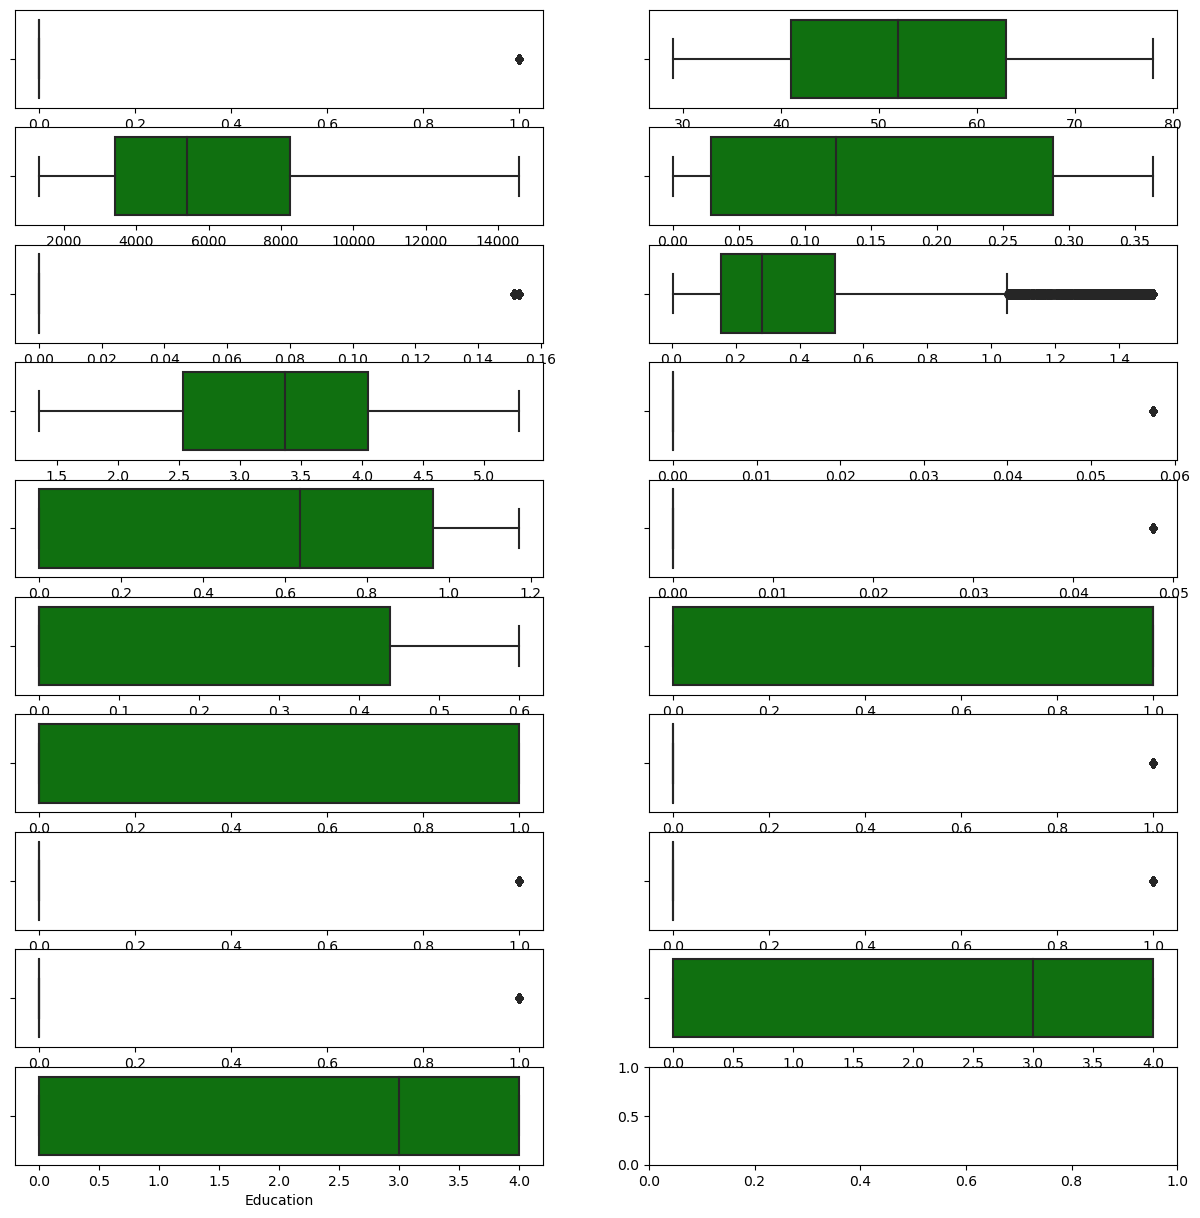

In [123]:
c = final_x_train_scaled.columns
fig , ax = plt.subplots(10, 2 , figsize=(15,15))
for i,subplot in zip(c, ax.flatten()):
    sns.boxplot(x = final_x_train_scaled[i], ax=subplot,color = 'g')

### Feature Selection

In [124]:
from sklearn.feature_selection import VarianceThreshold

In [125]:
var = VarianceThreshold(threshold=0.0)
var

VarianceThreshold()

In [126]:
var.fit(final_x_train_scaled)

VarianceThreshold()

In [127]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [128]:
len(var.get_feature_names_out())

19

In [129]:
remove = final_x_train_scaled.columns[~var.get_support()]

In [130]:
remove

Index([], dtype='object')

In [131]:
# Applying Quasi Constant method

In [132]:
quasi = VarianceThreshold(threshold=0.1)
quasi.fit(final_x_train_scaled)

VarianceThreshold(threshold=0.1)

In [133]:
keep = final_x_train_scaled.columns[quasi.get_support()]
keep

Index(['age_quan', 'MonthlyIncome_random_quan', 'DebtRatio_Yeo_quan',
       'NumberOfOpenCreditLinesAndLoans_Yeo_quan',
       'NumberRealEstateLoansOrLines_Yeo_quan', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupation', 'Education'],
      dtype='object')

In [134]:
remove = final_x_train_scaled.columns[~quasi.get_support()]
remove

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines_Yeo_quan',
       'NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan',
       'NumberOfTimes90DaysLate_Yeo_quan',
       'NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan',
       'NumberOfDependents_random_Yeo_quan'],
      dtype='object')

In [135]:
quasi_train = final_x_train_scaled.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines_Yeo_quan', 'NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan', 'NumberOfTimes90DaysLate_Yeo_quan', 'NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan', 'NumberOfDependents_random_Yeo_quan'], axis=1)

In [136]:
quasi_test = final_x_test_scaled.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines_Yeo_quan', 'NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan', 'NumberOfTimes90DaysLate_Yeo_quan', 'NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan', 'NumberOfDependents_random_Yeo_quan'], axis=1)

#### Using Corelation checking the numrical features. 

In [137]:
from feature_engine.selection import DropCorrelatedFeatures

In [138]:
cor = DropCorrelatedFeatures(threshold=0.85, method="pearson")

In [139]:
cor.fit(final_x_train_scaled[["NPA Status", "age_quan", "MonthlyIncome_random_quan", "RevolvingUtilizationOfUnsecuredLines_Yeo_quan", "NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan", "DebtRatio_Yeo_quan", "NumberOfOpenCreditLinesAndLoans_Yeo_quan", "NumberOfTimes90DaysLate_Yeo_quan", "NumberRealEstateLoansOrLines_Yeo_quan", "NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan", "NumberOfDependents_random_Yeo_quan"]])

DropCorrelatedFeatures(threshold=0.85)

In [140]:
cor.features_to_drop_

set()

### Null Hypothesis

In [141]:
from scipy.stats import pearsonr

In [142]:
sol = pearsonr(final_x_train_scaled["age_quan"], final_y_train)
result = np.array([sol])
result

array([[0.11684778, 0.        ]])

In [143]:
pvalue = []
for col in final_x_train_scaled.columns:
    sol = pearsonr(final_x_train_scaled[col], final_y_train)
    pvalue.append(sol)
pvalue = np.array(pvalue)

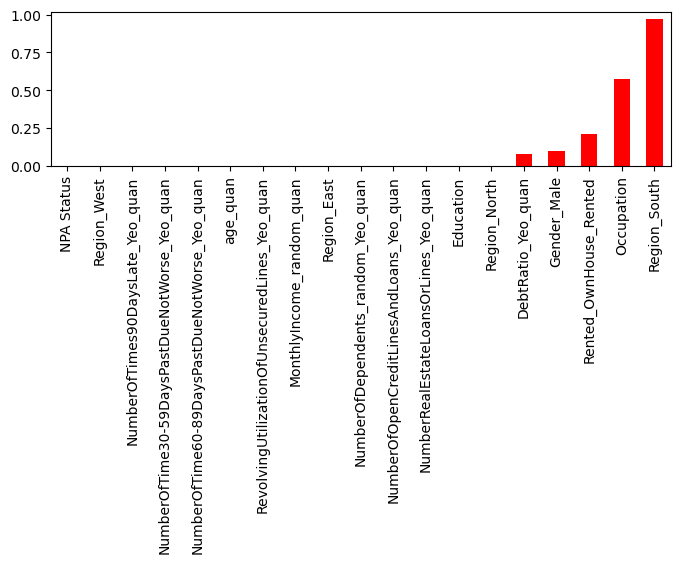

In [144]:
a = pd.Series(pvalue[:, 1], index=final_x_train_scaled.columns)
a = a.sort_values(ascending=True)
plt.figure(figsize=(8,2))
a.plot.bar(color="r")
plt.show()
 #   pvalue.append([col, a])
#pvaluedf = pd.DataFrame(pvalue, columns=["Feature", "P_Value"], dtype=float)

In [145]:
NHpear_xtrain = final_x_train_scaled.drop(["Region_South", "Occupation", "Rented_OwnHouse_Rented", "DebtRatio_Yeo_quan", "Gender_Male"], axis=1)

In [146]:
NHpear_xtrain.head(1)

,NPA Status,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan,Region_East,Region_North,Region_West,Education
0,0.0,54.0,7078.0,0.165022,-0.0,4.625435,-0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0,4.0


In [147]:
NHpear_xtest = final_x_test_scaled.drop(["Region_South", "Occupation", "Rented_OwnHouse_Rented", "DebtRatio_Yeo_quan", "Gender_Male"], axis=1)

In [148]:
NHpear_xtest.head()

,NPA Status,age_quan,MonthlyIncome_random_quan,RevolvingUtilizationOfUnsecuredLines_Yeo_quan,NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberOfTimes90DaysLate_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan,NumberOfDependents_random_Yeo_quan,Region_East,Region_North,Region_West,Education
0,0.0,59.0,10666.0,0.005048,-0.000000,5.289711,-0.0,0.954008,-0.0,0.600453,0.0,1.0,0.0,3.0
1,0.0,49.0,9250.0,0.348355,-0.000000,4.022465,-0.0,0.633581,-0.0,0.600453,0.0,1.0,0.0,0.0
2,0.0,46.0,13333.0,0.034936,-0.000000,3.097723,-0.0,0.633581,-0.0,-0.000000,0.0,0.0,0.0,4.0
3,0.0,66.0,5200.0,0.031019,-0.000000,3.589869,-0.0,-0.000000,-0.0,-0.000000,0.0,0.0,0.0,2.0
4,0.0,74.0,14591.1,0.347935,0.147961,4.221561,-0.0,0.633581,-0.0,-0.000000,0.0,0.0,1.0,4.0


### Chi2 Test

In [149]:
from sklearn.feature_selection import chi2

In [150]:
b = final_x_train_scaled["age_quan"].values.reshape(-1,1)
a = chi2(b, final_y_train)
a

(array([6857.36044624]), array([0.]))

In [151]:
def chi2_value(df, var, final_y_train):
    b = df[var].values.reshape(-1,1)
    a = chi2(b, final_y_train)
    return a

In [152]:
a = chi2_value(final_x_train_scaled, "age_quan", final_y_train)

In [153]:
chi_values = []
for col in final_x_train_scaled.columns:
    a = chi2_value(final_x_train_scaled, col, final_y_train)
    chi_values.append(a)
chi_values = np.array(chi_values)

In [154]:
chi2_values = pd.Series(chi_values[:, 1].flatten(), index=final_x_train_scaled.columns)
chi2_values = chi2_values.sort_values(ascending=True)
chi2_values

NPA Status                                        0.000000e+00
age_quan                                          0.000000e+00
MonthlyIncome_random_quan                         0.000000e+00
Region_West                                       0.000000e+00
NumberOfTime30-59DaysPastDueNotWorse_Yeo_quan    8.016046e-229
RevolvingUtilizationOfUnsecuredLines_Yeo_quan    5.467134e-214
NumberOfTimes90DaysLate_Yeo_quan                 7.047123e-187
NumberOfTime60-89DaysPastDueNotWorse_Yeo_quan    2.231564e-104
Region_East                                       1.559836e-68
Education                                         3.383052e-43
NumberOfOpenCreditLinesAndLoans_Yeo_quan          6.108490e-21
NumberOfDependents_random_Yeo_quan                7.048709e-19
NumberRealEstateLoansOrLines_Yeo_quan             4.647989e-18
Region_North                                      7.647985e-13
DebtRatio_Yeo_quan                                1.948609e-01
Gender_Male                                       3.077

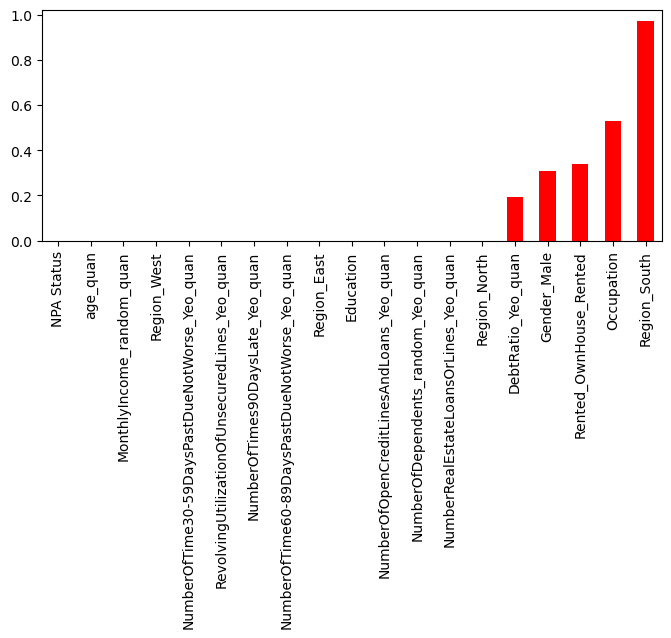

In [155]:
plt.figure(figsize=(8,3))
chi2_values.plot.bar(color="r")
plt.show()

### Checing the Data Balancing:

In [156]:
print("The number of 0 in final independent feature is:", sum(final_y_train==0))
print("The number of 1 in final independent feature is:", sum(final_y_train==1))

The number of 0 in final independent feature is: 9060
The number of 1 in final independent feature is: 125939


In [157]:
print("The number of 0 in final independent feature is:", sum(final_y_test==0))
print("The number of 1 in final independent feature is:", sum(final_y_test==1))

The number of 0 in final independent feature is: 966
The number of 1 in final independent feature is: 14035


In [158]:
from imblearn.over_sampling import SMOTE

In [159]:
smote = SMOTE(random_state=12)
smote

SMOTE(random_state=12)

In [160]:
resampled_x_train, resampled_y_train = smote.fit_resample(final_x_train_scaled, final_y_train)

In [161]:
print("The number of 0 in final independent feature is:", sum(resampled_y_train==0))
print("The number of 1 in final independent feature is:", sum(resampled_y_train==1))

The number of 0 in final independent feature is: 125939
The number of 1 in final independent feature is: 125939


#### Final Data:
- final_x_train_scaled
- final_x_test_scaled

#### Final Data After Feature Selection:
- quasi_train
- quasi_test
- NHpear_xtrain
- NHpear_xtest

#### Independent feature before sampling:
- final_y_train
- final_y_test

#### Resampled features:
- resampled_x_train
- resampled_y_train

# Model Development
- KNN
- Logistic
- Naive Bayes
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- Xtreme Gradient Boosting

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix

In [163]:
KNN = KNeighborsClassifier()
Logistic = LogisticRegression()
NB = GaussianNB()
Tree = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC()

In [164]:
reg_knn = KNN.fit(final_x_train_scaled, final_y_train)

In [165]:
print("Train accuracy with scaled data", reg_knn.score(final_x_train_scaled, final_y_train))
print("Test accuracy with scaled data", reg_knn.score(final_x_test_scaled, final_y_test))

Train accuracy with scaled data 0.939414366032341
Test accuracy with scaled data 0.9354709686020932


In [166]:
reg_knn_quasi = KNN.fit(quasi_train, final_y_train)
print("Train accuracy with quasi selected feature is", reg_knn_quasi.score(quasi_train, final_y_train))
print("Test accuracy with quasi selected feature is", reg_knn_quasi.score(quasi_test, final_y_test))

Train accuracy with quasi selected feature is 0.9351921125341669
Test accuracy with quasi selected feature is 0.9327378174788348


In [167]:
reg_knn_NH = KNN.fit(NHpear_xtrain, final_y_train)
print("Train accuracy with NHPearson selected feature is", reg_knn_NH.score(NHpear_xtrain, final_y_train))
print("Test accuracy with NHPearson selected feature is", reg_knn_NH.score(NHpear_xtest, final_y_test))

Train accuracy with NHPearson selected feature is 0.9437329165401225
Test accuracy with NHPearson selected feature is 0.9396040263982401


In [168]:
reg_knn_resampled = KNN.fit(resampled_x_train, resampled_y_train)
print("Train accuracy with resampled data", reg_knn_resampled.score(resampled_x_train, resampled_y_train))
print("Test accuracy with resampled data", reg_knn_resampled.score(final_x_test_scaled, final_y_test))

Train accuracy with resampled data 0.9324712757763679
Test accuracy with resampled data 0.7915472301846543


In [169]:
Logistic_modal = Logistic.fit(final_x_train_scaled, final_y_train)

In [170]:
print("Train accuracy with scaled data using Logistic Reg is: ", Logistic_modal.score(final_x_train_scaled, final_y_train))
print("Test accuracy with scaled data using Logistic Reg is: ", Logistic_modal.score(final_x_test_scaled, final_y_test))

Train accuracy with scaled data using Logistic Reg is:  0.99997037015089
Test accuracy with scaled data using Logistic Reg is:  0.9999333377774815


In [171]:
logistic_quasi = Logistic.fit(quasi_train, final_y_train)
print("Train accuracy with quasi selected feature is", logistic_quasi.score(quasi_train, final_y_train))
print("Test accuracy with quasi selected feature is", logistic_quasi.score(quasi_test, final_y_test))

print("--------------------------------------------------------------------------")

logistic_NH = Logistic.fit(NHpear_xtrain, final_y_train)
print("Train accuracy with NHPearson selected feature is", logistic_NH.score(NHpear_xtrain, final_y_train))
print("Test accuracy with NHPearson selected feature is", logistic_NH.score(NHpear_xtest, final_y_test))

print("--------------------------------------------------------------------------")

logistic_resampled = Logistic.fit(resampled_x_train, resampled_y_train)
print("Train accuracy with resampled data", reg_knn_resampled.score(resampled_x_train, resampled_y_train))
print("Test accuracy with resampled data", reg_knn_resampled.score(final_x_test_scaled, final_y_test))

Train accuracy with quasi selected feature is 0.932769872369425
Test accuracy with quasi selected feature is 0.9354709686020932
--------------------------------------------------------------------------
Train accuracy with NHPearson selected feature is 1.0
Test accuracy with NHPearson selected feature is 1.0
--------------------------------------------------------------------------
Train accuracy with resampled data 0.9324712757763679
Test accuracy with resampled data 0.7915472301846543


In [183]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(final_x_train_scaled, final_y_train)
print("Training accuracy is: ", KNN.score(final_x_train_scaled, final_y_train))

Training accuracy is:  0.939414366032341


In [236]:
def KNN_algo(quasi_train, final_y_train, quasi_test, final_y_test):
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", KNN.score(quasi_train, final_y_train))
    print("Test accuracy is: ", KNN.score(quasi_test, final_y_test))
    y_test_pred = KNN.predict(quasi_test)
    print("Test Data Confusion Matrix: ", confusion_matrix(final_y_test, y_test_pred))
    print("Test Data Classification report is: ", classification_report(final_y_test, y_test_pred))

In [237]:
def logistic_algo(quasi_train, final_y_train, quasi_test, final_y_test):
    log = LogisticRegression()
    log.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", log.score(quasi_train, final_y_train))
    print("The test accuracy is: ", log.score(quasi_test, final_y_test))
    y_test_predict = log.predict(quasi_test)
    print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
    print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

In [238]:
def naive_b_algo(quasi_train, final_y_train, quasi_test, final_y_test):
    NB = GaussianNB()
    NB.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", NB.score(quasi_train, final_y_train))
    print("The test accuracy is: ", NB.score(quasi_test, final_y_test))
    y_test_predict = NB.predict(quasi_test)
    print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
    print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

NB = GaussianNB()
NB.fit(quasi_train, final_y_train)
print("Training accuracy is: ", NB.score(quasi_train, final_y_train))
print("The test accuracy is: ", NB.score(quasi_test, final_y_test))
y_test_predict = NB.predict(quasi_test)
print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

In [239]:
def decision_tree_algo(quasi_train, final_y_train, quasi_test, final_y_test):
    tree = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=12)
    tree.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", tree.score(quasi_train, final_y_train))
    print("The test accuracy is: ", tree.score(quasi_test, final_y_test))
    y_test_predict = tree.predict(quasi_test)
    print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
    print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

tree = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=12)
tree.fit(quasi_train, final_y_train)
print("Training accuracy is: ", tree.score(quasi_train, final_y_train))
print("The test accuracy is: ", tree.score(quasi_test, final_y_test))
y_test_predict = tree.predict(quasi_test)
print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

In [240]:
def RFC_algo(quasi_train, final_y_train, quasi_test, final_y_test):
    RFC = RandomForestClassifier(n_estimators=100, criterion="entropy", class_weight="balanced", random_state=12)
    RFC.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", RFC.score(quasi_train, final_y_train))
    print("The test accuracy is: ", RFC.score(quasi_test, final_y_test))
    y_test_predict = RFC.predict(quasi_test)
    print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
    print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

In [241]:
RFC = RandomForestClassifier(n_estimators=100, criterion="entropy", class_weight="balanced", random_state=12)
RFC.fit(quasi_train, final_y_train)
print("Training accuracy is: ", RFC.score(quasi_train, final_y_train))
print("The test accuracy is: ", RFC.score(quasi_test, final_y_test))
y_test_predict = RFC.predict(quasi_test)
print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

Training accuracy is:  0.9996666641975126
The test accuracy is:  0.9503366442237184
The data confusion matrix is:  [[  274   692]
 [   53 13982]]
The data classification report is:                precision    recall  f1-score   support

           0       0.84      0.28      0.42       966
           1       0.95      1.00      0.97     14035

    accuracy                           0.95     15001
   macro avg       0.90      0.64      0.70     15001
weighted avg       0.95      0.95      0.94     15001



In [243]:
def ABC_algo(quasi_train, final_y_train, quasi_test, final_y_test, Logistic_modal):
    ABC = AdaBoostClassifier(n_estimators=100, random_state=12, base_estimator=Logistic_modal)
    ABC.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", ABC.score(quasi_train, final_y_train))
    print("The test accuracy is: ", ABC.score(quasi_test, final_y_test))
    y_test_predict = ABC.predict(quasi_test)
    print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
    print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

In [244]:
def GBC_algo(quasi_train, final_y_train, quasi_test, final_y_test):
    GBC = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state=12)
    GBC.fit(quasi_train, final_y_train)
    print("Training accuracy is: ", GBC.score(quasi_train, final_y_train))
    print("The test accuracy is: ", GBC.score(quasi_test, final_y_test))
    y_test_predict = GBC.predict(quasi_test)
    print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
    print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

GBC = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state=12)
GBC.fit(quasi_train, final_y_train)
print("Training accuracy is: ", GBC.score(quasi_train, final_y_train))
print("The test accuracy is: ", GBC.score(quasi_test, final_y_test))
y_test_predict = GBC.predict(quasi_test)
print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

In [245]:
def result(quasi_train, final_y_train, quasi_test, final_y_test, Logistic_modal):
    print("------------KNN----Results---------------------")
    KNN_algo(quasi_train, final_y_train, quasi_test, final_y_test)
    print("------------Logistic---Results---------------------")
    logistic_algo(quasi_train, final_y_train, quasi_test, final_y_test)
    print("------------NaiveBayes---Results---------------------")
    naive_b_algo(quasi_train, final_y_train, quasi_test, final_y_test)
    print("------------DecisionTree---Results---------------------")
    decision_tree_algo(quasi_train, final_y_train, quasi_test, final_y_test)
    print("------------RandomForest---Results---------------------")
    RFC_algo(quasi_train, final_y_train, quasi_test, final_y_test)
    print("------------Adaboost---Results---------------------")
    ABC_algo(quasi_train, final_y_train, quasi_test, final_y_test, Logistic_modal)
    print("------------GradientBoosting---Results---------------------")
    GBC_algo(quasi_train, final_y_train, quasi_test, final_y_test)

In [246]:
result(quasi_train, final_y_train, quasi_test, final_y_test, Logistic_modal)

------------KNN----Results---------------------
Training accuracy is:  0.9351921125341669
Test accuracy is:  0.9327378174788348
Test Data Confusion Matrix:  [[   12   954]
 [   55 13980]]
Test Data Classification report is:                precision    recall  f1-score   support

           0       0.18      0.01      0.02       966
           1       0.94      1.00      0.97     14035

    accuracy                           0.93     15001
   macro avg       0.56      0.50      0.49     15001
weighted avg       0.89      0.93      0.90     15001

------------Logistic---Results---------------------
Training accuracy is:  0.932769872369425
The test accuracy is:  0.9354709686020932
The data confusion matrix is:  [[    0   966]
 [    2 14033]]
The data classification report is:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       966
           1       0.94      1.00      0.97     14035

    accuracy                           0.94     150

#### AUC & RO Curve

In [223]:
from sklearn.metrics import roc_auc_score, roc_curve

In [250]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(quasi_train, final_y_train)
KNN_pred_prob = KNN.predict_proba(quasi_test)[:, 1]

log = LogisticRegression()
log.fit(quasi_train, final_y_train)
log_pred_prob = log.predict_proba(quasi_test)[:, 1]

NB = GaussianNB()
NB.fit(quasi_train, final_y_train)
NB_pred_prob = NB.predict_proba(quasi_test)[:, 1]

tree = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=12)
tree.fit(quasi_train, final_y_train)
tree_pred_prob = tree.predict_proba(quasi_test)[:, 1]

RFC = RandomForestClassifier(n_estimators=100, criterion="entropy", class_weight="balanced", random_state=12)
RFC.fit(quasi_train, final_y_train)
RFC_pred_prob = RFC.predict_proba(quasi_test)[:, 1]

ABC = AdaBoostClassifier(n_estimators=100, random_state=12, base_estimator=Logistic_modal)
ABC.fit(quasi_train, final_y_train)
ABC_pred_prob = ABC.predict_proba(quasi_test)[:, 1]

GBC = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state=12)
GBC.fit(quasi_train, final_y_train)
GBC_pred_prob = GBC.predict_proba(quasi_test)[:, 1]

In [252]:
fpr_knn, tpr_knn, threshold = roc_curve(final_y_test, KNN_pred_prob)
#KNN_pred_prob 
fpr_log, tpr_log, threshold = roc_curve(final_y_test, log_pred_prob)
#log_pred_prob
fpr_nb, tpr_nb, threshold = roc_curve(final_y_test, NB_pred_prob)
#NB_pred_prob 
fpr_tree, tpr_tree, threshold = roc_curve(final_y_test, tree_pred_prob)
#tree_pred_prob
fpr_RFC, tpr_RFC, threshold = roc_curve(final_y_test, RFC_pred_prob)
#RFC_pred_prob
fpr_ABC, tpr_ABC, threshold = roc_curve(final_y_test, ABC_pred_prob)
#ABC_pred_prob
fpr_GBC, tpr_GBC, threshold = roc_curve(final_y_test, GBC_pred_prob)
#GBC_pred_prob

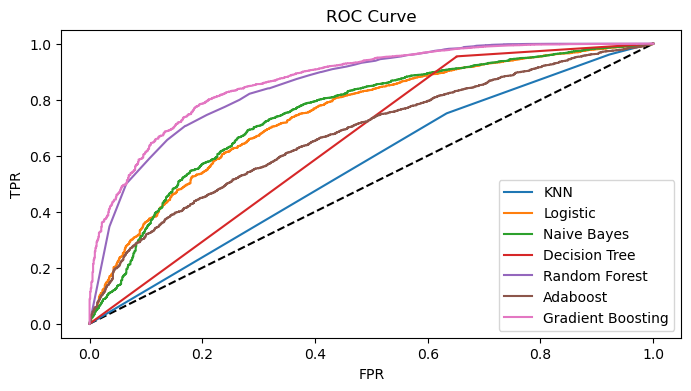

In [264]:
plt.figure(figsize=(8,4))
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_log, tpr_log, label="Logistic")
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot(fpr_RFC, tpr_RFC, label="Random Forest")
plt.plot(fpr_ABC, tpr_ABC, label="Adaboost")
plt.plot(fpr_GBC, tpr_GBC, label="Gradient Boosting")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc=0)
plt.show()

In [265]:
GBC = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state=12)
GBC.fit(quasi_train, final_y_train)
print("Training accuracy is: ", GBC.score(quasi_train, final_y_train))
print("The test accuracy is: ", GBC.score(quasi_test, final_y_test))
y_test_predict = GBC.predict(quasi_test)
print("The data confusion matrix is: ", confusion_matrix(final_y_test, y_test_predict))
print("The data classification report is: ", classification_report(final_y_test, y_test_predict))

Training accuracy is:  0.9425329076511678
The test accuracy is:  0.944670355309646
The data confusion matrix is:  [[  174   792]
 [   38 13997]]
The data classification report is:                precision    recall  f1-score   support

           0       0.82      0.18      0.30       966
           1       0.95      1.00      0.97     14035

    accuracy                           0.94     15001
   macro avg       0.88      0.59      0.63     15001
weighted avg       0.94      0.94      0.93     15001



In [266]:
import pickle

In [267]:
with open("Credit.pkl", "wb") as f:
    pickle.dump(GBC, f)

In [268]:
modal = pickle.load(open("Credit.pkl", "rb"))

In [271]:
quasi_test.head()

,age_quan,MonthlyIncome_random_quan,DebtRatio_Yeo_quan,NumberOfOpenCreditLinesAndLoans_Yeo_quan,NumberRealEstateLoansOrLines_Yeo_quan,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupation,Education
0,59.0,10666.0,1.506460,5.289711,0.954008,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
1,49.0,9250.0,0.283114,4.022465,0.633581,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0
2,46.0,13333.0,0.255696,3.097723,0.633581,1.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0
3,66.0,5200.0,0.423682,3.589869,-0.000000,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
4,74.0,14591.1,0.364289,4.221561,0.633581,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0


In [273]:
modal.predict([[45, 145000, 1.25, 5.3, 0.57, 0.0, 1, 0, 0, 0, 0, 3.0, 4.0]])

array([1])

In [275]:
if modal.predict([[45, 145000, 1.25, 5.3, 0.57, 0.0, 1, 0, 0, 0, 0, 3.0, 4.0]])[0]==0:
    print("It's a fraud transaction")
else:
    print("It's a good  transaction")

It's a good  transaction
